In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

import drag_functions_turb as fn
from time_TvsR import *
from PebAcc_Turb import *

%load_ext autoreload
%autoreload 2

## Pebble Size vs Growth Time

In [2]:
s_array = np.logspace(-3,4,100)
t_growth = np.zeros([s_array.size, 5])
min1_arr = np.zeros(t_growth.shape)
r_hill_arr = np.zeros(t_growth.shape)
r_bondi_arr = np.zeros(t_growth.shape)
r_shear_arr = np.zeros(t_growth.shape)

for i in range(s_array.size):
    t_growth[i,0], min1_arr[i,0], r_hill_arr[i,0], r_bondi_arr[i,0], r_shear_arr[i,0] = TvsR_sng(alph=1e-100, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,1], min1_arr[i,1], r_hill_arr[i,1], r_bondi_arr[i,1], r_shear_arr[i,1] = TvsR_sng(alph=1e-4, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,2], min1_arr[i,2], r_hill_arr[i,2], r_bondi_arr[i,2], r_shear_arr[i,2] = TvsR_sng(alph=1e-3, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,3], min1_arr[i,3], r_hill_arr[i,3], r_bondi_arr[i,3], r_shear_arr[i,3] = TvsR_sng(alph=1e-2, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,4], min1_arr[i,4], r_hill_arr[i,4], r_bondi_arr[i,4], r_shear_arr[i,4] = TvsR_sng(alph=1e-1, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    
plt.loglog(s_array, t_growth[:,0], 'k')
plt.loglog(s_array, t_growth[:,1], 'b--')
plt.loglog(s_array, t_growth[:,2], 'm--')
plt.loglog(s_array, t_growth[:,3], 'g--')
plt.loglog(s_array, t_growth[:,4], 'r--')
plt.ylim(1e2,1e8)
plt.title("Fig 5. Original Code")
plt.show()

In [3]:
t_growth2 = np.zeros([s_array.size, 5])
min1_arr2 = np.zeros(t_growth.shape)
r_hill_arr2 = np.zeros(t_growth.shape)
r_bondi_arr2 = np.zeros(t_growth.shape)
r_shear_arr2 = np.zeros(t_growth.shape)

# Initializes the core objects
core_lam = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a4 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a3 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a2 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a1 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-1, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
for i in range(s_array.size):
    core_lam.main(s_array[i])
    core_a4.main(s_array[i])
    core_a3.main(s_array[i])
    core_a2.main(s_array[i])
    core_a1.main(s_array[i])
    t_growth2[i,0] = core_lam.t_acc
    t_growth2[i,1] = core_a4.t_acc
    t_growth2[i,2] = core_a3.t_acc
    t_growth2[i,3] = core_a2.t_acc
    t_growth2[i,4] = core_a1.t_acc
    min1_arr2[i,0] = np.minimum(core_lam.r_ws, core_lam.r_sh)
    min1_arr2[i,1] = np.minimum(core_a4.r_ws, core_a4.r_sh)
    min1_arr2[i,2] = np.minimum(core_a3.r_ws, core_a3.r_sh)
    min1_arr2[i,3] = np.minimum(core_a2.r_ws, core_a2.r_sh)
    min1_arr2[i,4] = np.minimum(core_a1.r_ws, core_a1.r_sh)
    r_hill_arr2[i,0] = core_lam.r_hill
    r_hill_arr2[i,1] = core_a4.r_hill
    r_hill_arr2[i,2] = core_a3.r_hill
    r_hill_arr2[i,3] = core_a2.r_hill
    r_hill_arr2[i,4] = core_a1.r_hill
    r_bondi_arr2[i,0] = core_lam.r_bondi
    r_bondi_arr2[i,1] = core_a4.r_bondi
    r_bondi_arr2[i,2] = core_a3.r_bondi
    r_bondi_arr2[i,3] = core_a2.r_bondi
    r_bondi_arr2[i,4] = core_a1.r_bondi
    r_shear_arr2[i,0] = core_lam.r_sh
    r_shear_arr2[i,1] = core_a4.r_sh
    r_shear_arr2[i,2] = core_a3.r_sh
    r_shear_arr2[i,3] = core_a2.r_sh
    r_shear_arr2[i,4] = core_a1.r_sh
    
plt.loglog(s_array, t_growth2[:,0], 'k')
plt.loglog(s_array, t_growth2[:,1], 'b--')
plt.loglog(s_array, t_growth2[:,2], 'm--')
plt.loglog(s_array, t_growth2[:,3], 'g--')
plt.loglog(s_array, t_growth2[:,4], 'r--')
plt.ylim(1e2,1e8)
plt.title("Fig 5. New Code")
plt.show()

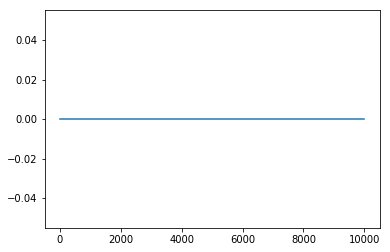

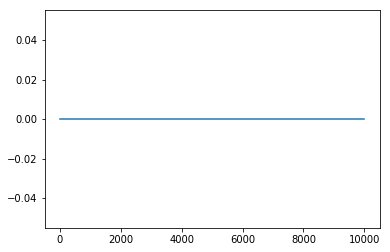

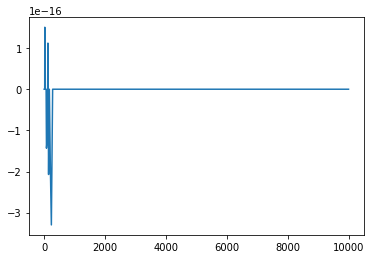

In [4]:
#min1_arr[i,0], r_hill_arr[i,0], r_bondi_arr[i,0], r_shear_arr[i,0]
#min1_arr2[i,0], r_hill_arr2[i,0], r_bondi_arr2[i,0], r_shear_arr2[i,0]

i = 4
plt.plot(s_array, (min1_arr2[:,i] - min1_arr[:,i])/min1_arr[:,i])
plt.show()
plt.plot(s_array, (r_hill_arr2[:,i] - r_hill_arr[:,i])/r_hill_arr[:,i])
plt.show()
plt.plot(s_array, (r_bondi_arr2[:,i] - r_bondi_arr[:,i])/r_bondi_arr[:,i])
plt.show()
plt.plot(s_array, (r_shear_arr2[:,i] - r_shear_arr[:,i])/r_shear_arr[:,i])
plt.show()

## Growth time vs Turbulence strength

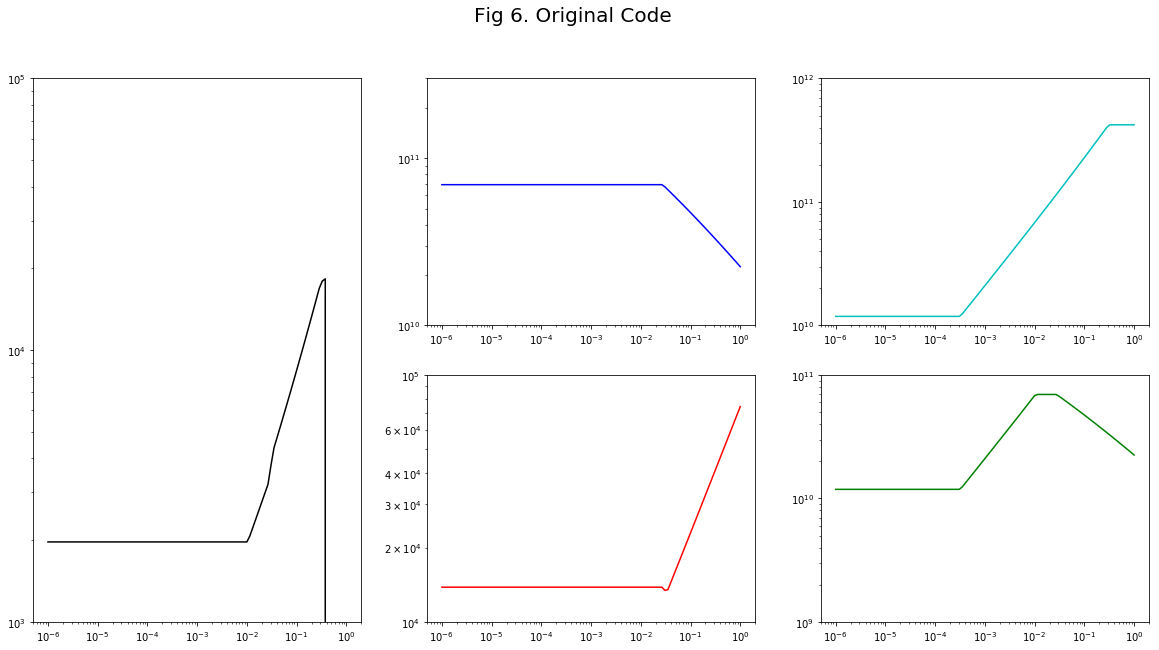

In [5]:
from matplotlib import gridspec

alpha_array = np.logspace(-6,0,100)
t_growth = np.zeros(s_array.size)
r_acc_arr = np.zeros(t_growth.shape)
H_p_arr = np.zeros(t_growth.shape)
v_inf_arr = np.zeros(t_growth.shape)
H_acc_arr = np.zeros(t_growth.shape)

for i in range(alpha_array.size):
    t_growth[i], H_p_arr[i], sig_p, r_acc_arr[i], H_acc_arr[i], v_inf_arr[i] = TvsR_sng(alph=alpha_array[i], a_au=1, m_suns=1, m_earths=1e-1, r=35, out='time_param')

# Setup figure and grid
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 3)

ax0 = plt.subplot(gs[:,0])    
ax0.loglog(alpha_array, t_growth, 'k-')
ax0.set_ylim(1e3,1e5)

ax1 = plt.subplot(gs[0,1])
ax1.loglog(alpha_array, r_acc_arr, 'b-')
ax1.set_ylim(1e10, 3e11)

ax2 = plt.subplot(gs[0,2])
ax2.loglog(alpha_array, H_p_arr, 'c-')
ax2.set_ylim(1e10, 1e12)

ax3 = plt.subplot(gs[1,1])
ax3.loglog(alpha_array, v_inf_arr, 'r-')
ax3.set_ylim(1e4, 1e5)

ax4 = plt.subplot(gs[1,2])
ax4.loglog(alpha_array, H_acc_arr, 'g-')
ax4.set_ylim(1e9, 1e11)

fig.suptitle("Fig 6. Original Code", size=20)
plt.show()

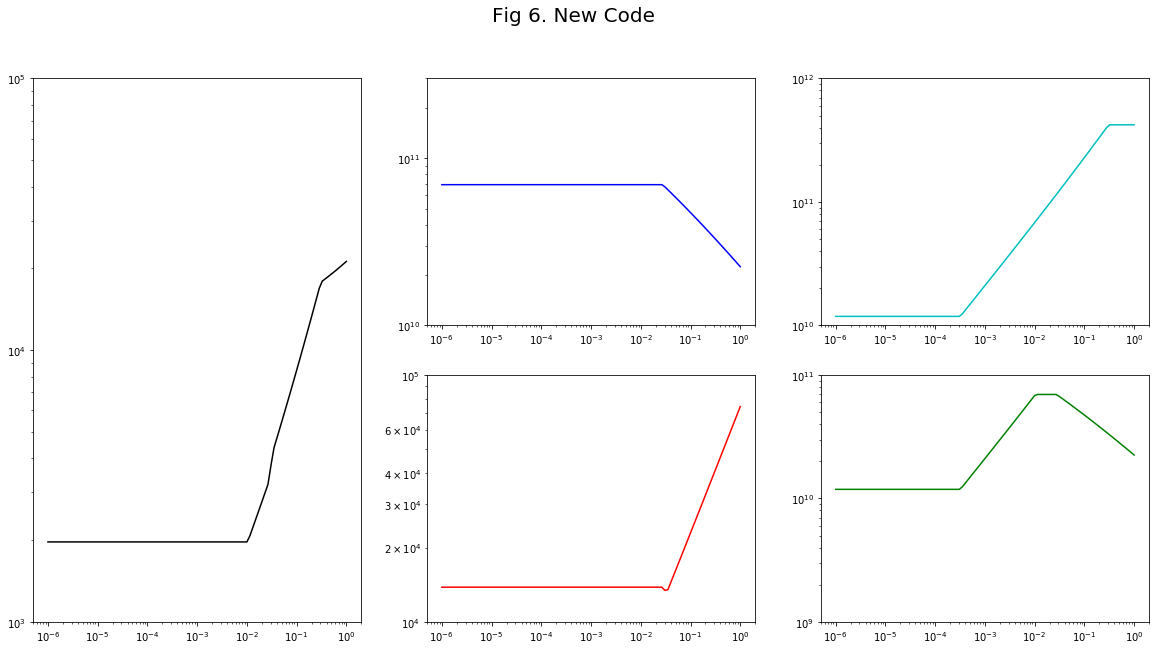

In [6]:
t_growth2 = np.zeros(alpha_array.size)
r_acc_arr2 = np.zeros(t_growth.shape)
H_p_arr2 = np.zeros(t_growth.shape)
v_inf_arr2 = np.zeros(t_growth.shape)
H_acc_arr2 = np.zeros(t_growth.shape)

# Initializes the core objects
for i in range(alpha_array.size):
    core = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=alpha_array[i], m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core.main(s=35)
    t_growth2[i] = core.t_acc
    r_acc_arr2[i] = core.r_acc
    H_p_arr2[i] = core.H_disk
    v_inf_arr2[i] = core.v_inf
    H_acc_arr2[i] = core.H_acc
    
# Setup figure and grid
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 3)

ax0 = plt.subplot(gs[:,0])    
ax0.loglog(alpha_array, t_growth2, 'k-')
ax0.set_ylim(1e3,1e5)

ax1 = plt.subplot(gs[0,1])
ax1.loglog(alpha_array, r_acc_arr2, 'b-')
ax1.set_ylim(1e10, 3e11)

ax2 = plt.subplot(gs[0,2])
ax2.loglog(alpha_array, H_p_arr2, 'c-')
ax2.set_ylim(1e10, 1e12)

ax3 = plt.subplot(gs[1,1])
ax3.loglog(alpha_array, v_inf_arr2, 'r-')
ax3.set_ylim(1e4, 1e5)

ax4 = plt.subplot(gs[1,2])
ax4.loglog(alpha_array, H_acc_arr2, 'g-')
ax4.set_ylim(1e9, 1e11)

fig.suptitle("Fig 6. New Code", size=20)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


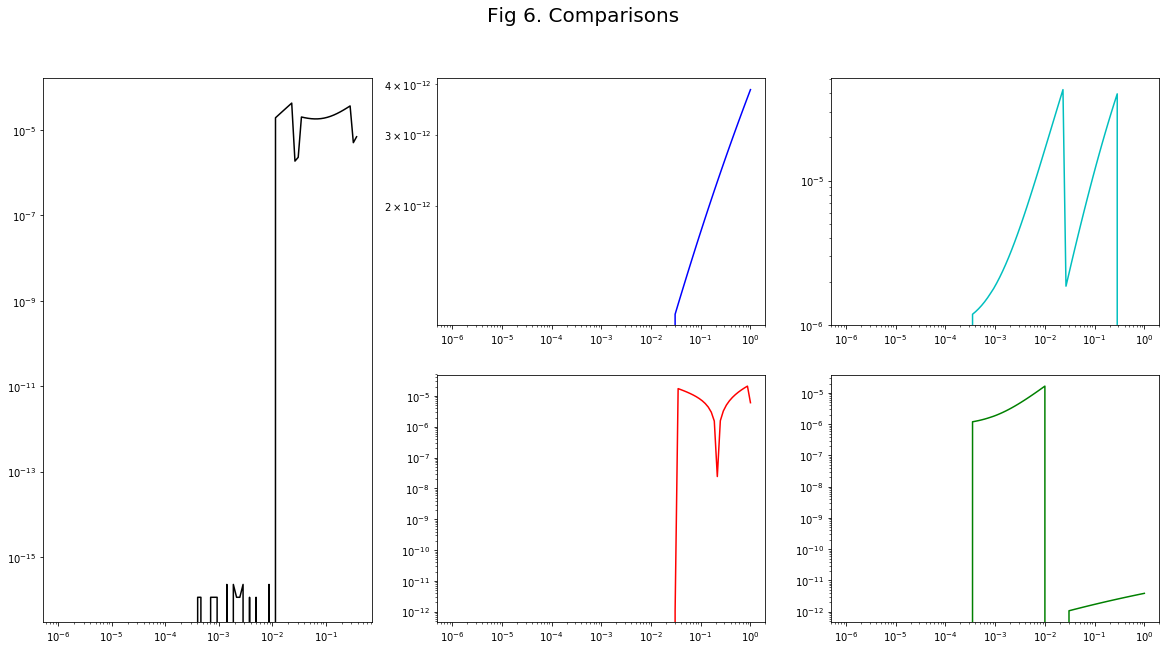

In [7]:
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 3)

ax0 = plt.subplot(gs[:,0])    
ax0.loglog(alpha_array, np.abs(t_growth2 - t_growth)/t_growth, 'k-')
#ax0.set_ylim(1e3,1e5)

ax1 = plt.subplot(gs[0,1])
ax1.loglog(alpha_array, np.abs(r_acc_arr2 - r_acc_arr)/r_acc_arr, 'b-')
#ax1.set_ylim(1e10, 3e11)

ax2 = plt.subplot(gs[0,2])
ax2.loglog(alpha_array, np.abs(H_p_arr2 - H_p_arr)/H_p_arr, 'c-')
#ax2.set_ylim(1e10, 1e12)

ax3 = plt.subplot(gs[1,1])
ax3.loglog(alpha_array, np.abs(v_inf_arr2 - v_inf_arr)/v_inf_arr, 'r-')
#ax3.set_ylim(1e4, 1e5)

ax4 = plt.subplot(gs[1,2])
ax4.loglog(alpha_array, np.abs(H_acc_arr2 - H_acc_arr)/H_acc_arr, 'g-')
#ax4.set_ylim(1e9, 1e11)

fig.suptitle("Fig 6. Comparisons", size=20)
plt.show()

## Growth Time vs Core Mass and Particle Size

Exists
0 1e-100 -4.0 8.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Exists
1 1e-05 -4.0 8.0
Exists
2 0.0001 -4.0 8.0
Exists
3 0.001 -4.0 8.0


Text(0.5, 0.98, 'Original Code')

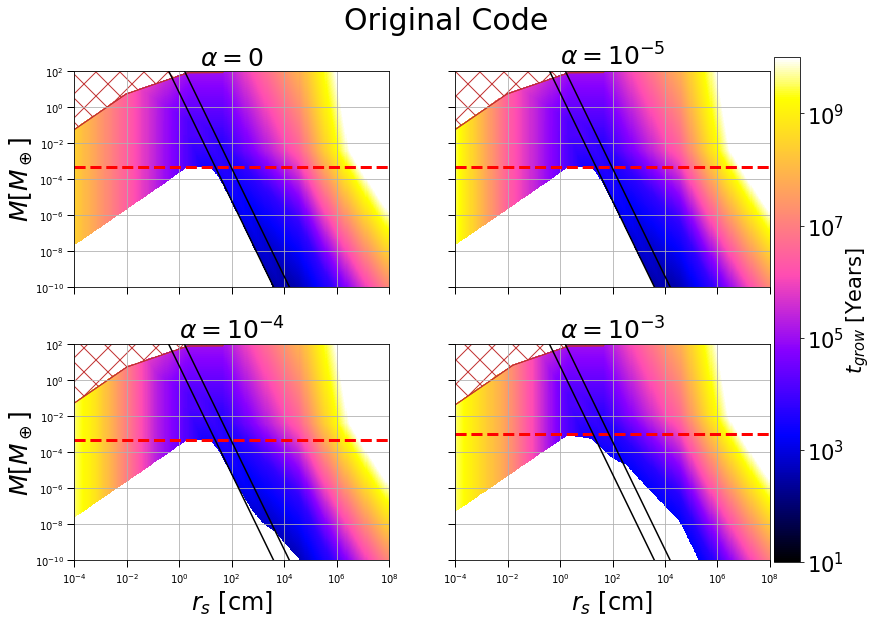

In [8]:
import os
from matplotlib.colors import LogNorm

semi_maj = 30.
alph_arr = [1e-100,1e-5,1e-4,1e-3]#,1e-2]

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

s_array = np.logspace(-4,8,300)
st_array = np.zeros(s_array.shape)
for i, s in enumerate(s_array):
    st_array[i] = st_rad(rad=s, a_au=30)

cmap = 'gnuplot2'

file_names = ['a_30.0_M_*_1.0_alph_0.00000_long_grid_2', 'a_30.0_M_*_1.0_alph_0.00001_long_grid_2',
              'a_30.0_M_*_1.0_alph_0.00010_long_grid_2', 'a_30.0_M_*_1.0_alph_0.00100_long_grid_2']#,
              #'a_30.0_M_*_1.0_alph_0.01000_long_grid_2']

fig = plt.figure(1,figsize=(12,9))

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('Data/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)
    
    st_arr = [st_rad(a_au=semi_maj,rad=r) for r in r_arr]

    ax = plt.subplot(2,2,j+1)
    
    if os.path.exists('Data/' + fname + '.txt'):
        time_arr = np.loadtxt('Data/' + fname + '.txt')
        print("Exists")
    else:
        time_arr = np.loadtxt('Data/' + fname)
        print("Does Not Exist")
        
    print(j,alph, r_range_low, r_range_hi)
    
    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)
        
    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
    rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph_arr[j]*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
    rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.
    
    v_gas = np.sqrt(alph_arr[j]*c_s**2. + eta**2.*vk**2.)
    rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas
    
    rad_min = np.maximum(rad_min_1,rad_min_2)
    rad_min = np.maximum(rad_min,rad_min_3)
    
    m_crit = 4.28453*(semi_maj)**(6./7.)
    m_crit_ind = np.where(m_arr<m_crit)[0][-1]
    r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
    rad_min[m_crit_ind+2::] = r_s_crit

    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')
    
    m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
    plt.axhline(y=m_crit,linestyle='dashed',linewidth=3,color='r')
    T = 200*semi_maj**(-3./7.)
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(30*fn.au)**3.)
    vk = 30*fn.au*om
    eta = c_s**2./2./vk**2.
    plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    
    
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.265,wspace=0.21)
fig.suptitle("Original Code", size=30)

In [9]:
m_array = np.logspace(-10,2,300)
s_array = np.logspace(-4,8,300)
t_growth_cb = np.zeros([m_array.size, s_array.size, 5])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a5 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a4 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a3 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a2 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)

    for i in range(s_array.size):
        core_lam.main(s_array[i])
        core_a5.main(s_array[i])
        core_a4.main(s_array[i])
        core_a3.main(s_array[i])
        core_a2.main(s_array[i])
        
        t_growth_cb[j, i, 0] = core_lam.t_acc
        t_growth_cb[j, i, 1] = core_a5.t_acc
        t_growth_cb[j, i, 2] = core_a4.t_acc
        t_growth_cb[j, i, 3] = core_a3.t_acc
        t_growth_cb[j, i, 4] = core_a2.t_acc

Text(0.5, 0.98, 'New Code')

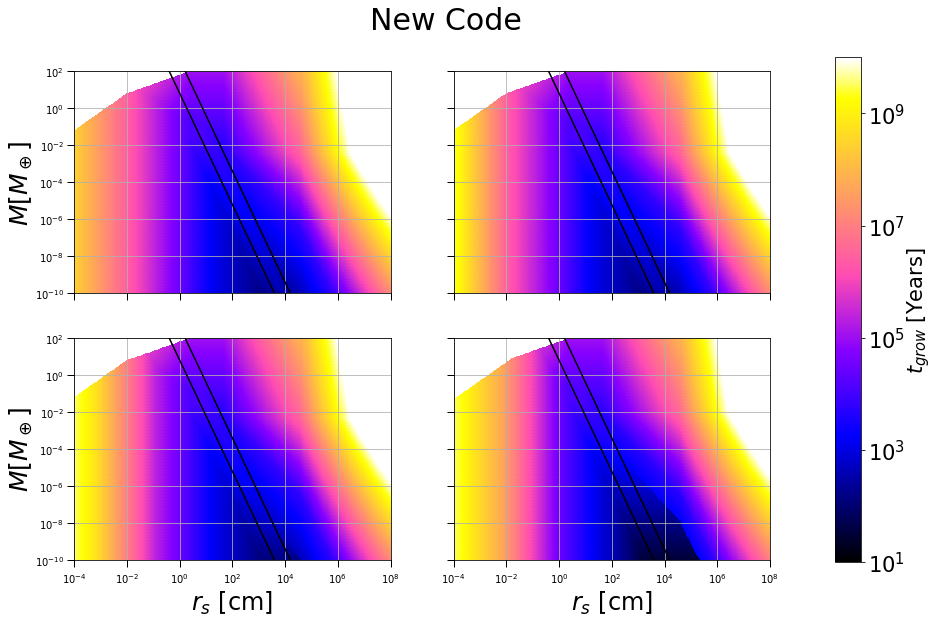

In [10]:
fig = plt.figure(1,figsize=(12,9))

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)
    T = 200*semi_maj**(-3./7.)
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(30*fn.au)**3.)
    vk = 30*fn.au*om
    eta = c_s**2./2./vk**2.
    plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        ax.set_xlabel(r'$r_{s}$ [cm]',fontsize=24)
        ax.set_ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        
    ax.set_ylim(1e-10,1e2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.2,wspace=0.2) #(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)

In [11]:
m_array = np.logspace(-22,2,300)
s_array = np.logspace(-8,8,300)
t_growth_cb = np.zeros([m_array.size, s_array.size, 5])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a5 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a4 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a3 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a2 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)

    for i in range(s_array.size):
        core_lam.main(s_array[i], rho_obj=5.51)
        core_a5.main(s_array[i], rho_obj=5.51)
        core_a4.main(s_array[i], rho_obj=5.51)
        core_a3.main(s_array[i], rho_obj=5.51)
        core_a2.main(s_array[i], rho_obj=5.51)
        
        t_growth_cb[j, i, 0] = core_lam.t_acc
        t_growth_cb[j, i, 1] = core_a5.t_acc
        t_growth_cb[j, i, 2] = core_a4.t_acc
        t_growth_cb[j, i, 3] = core_a3.t_acc
        t_growth_cb[j, i, 4] = core_a2.t_acc

In [12]:
def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(r1), st_rad(r2))
    ax_r.figure.canvas.draw()
    
fig = plt.figure(1,figsize=(12,9))

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e12)
    T = 200*semi_maj**(-3./7.)
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(30*fn.au)**3.)
    vk = 30*fn.au*om
    eta = c_s**2./2./vk**2.
    plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        ax.set_xlabel(r'$r_{s}$ [cm]',fontsize=24)
        ax.set_ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e-22,1e2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.25,wspace=0.25) #(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)


r_test = (3 * 1e-22*fn.m_earth/(4 * np.pi * 2))**(1/3)
print(r_test, '{:.2e}'.format(st_rad(r_test)))

41.472860853609056 5.65e-01


In [13]:
semi_maj = 30.
alph_arr = [1e-100,1e-5,1e-4,1e-3]#,1e-2]

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

s_array = np.logspace(-8,8,300)
st_array = np.zeros(s_array.shape)
for i, s in enumerate(s_array):
    st_array[i] = st_rad(rad=s, a_au=30)

cmap = 'gnuplot2'

file_names = ['a_30.0_M_*_1.0_alph_0.00000_long_grid_3', 'a_30.0_M_*_1.0_alph_0.00001_long_grid_3',
              'a_30.0_M_*_1.0_alph_0.00010_long_grid_3', 'a_30.0_M_*_1.0_alph_0.00100_long_grid_2']#,
              #'a_30.0_M_*_1.0_alph_0.01000_long_grid_2']

fig = plt.figure(1,figsize=(12,9))

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('Data/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)
    
    st_arr = [st_rad(a_au=semi_maj,rad=r) for r in r_arr]

    ax = plt.subplot(2,2,j+1)
    
    if os.path.exists('Data/' + fname + '.txt'):
        time_arr = np.loadtxt('Data/' + fname + '.txt')
        print("Exists")
    else:
        time_arr = np.loadtxt('Data/' + fname)
        print("Does Not Exist")
        
    print(j,alph, r_range_low, r_range_hi)
    
    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)
        
    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
    rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph_arr[j]*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
    rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.
    
    v_gas = np.sqrt(alph_arr[j]*c_s**2. + eta**2.*vk**2.)
    rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas
    
    rad_min = np.maximum(rad_min_1,rad_min_2)
    rad_min = np.maximum(rad_min,rad_min_3)
    
    m_crit = 4.28453*(semi_maj)**(6./7.)
    m_crit_ind = np.where(m_arr<m_crit)[0][-1]
    r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
    rad_min[m_crit_ind+2::] = r_s_crit

    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')
    
    m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
    plt.axhline(y=m_crit,linestyle='dashed',linewidth=3,color='r')
    T = 200*semi_maj**(-3./7.)
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(30*fn.au)**3.)
    vk = 30*fn.au*om
    eta = c_s**2./2./vk**2.
    plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    
    
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.265,wspace=0.21)
fig.suptitle("Original Code", size=30)

Exists
0 1e-100 -4.0 8.0
Exists
1 1e-05 -4.0 8.0
Exists
2 0.0001 -4.0 8.0
Exists
3 0.001 -4.0 8.0


Text(0.5, 0.98, 'Original Code')

In [14]:
index = np.argmin(abs(st_array - 1)) # :)
print(index, st_array[index], s_array[index])

165 1.0154829189242653 6.751984523072495


In [15]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 2))**(1/3)

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e11)
    T = 200*semi_maj**(-3./7.)
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(30*fn.au)**3.)
    vk = 30*fn.au*om
    eta = c_s**2./2./vk**2.

    plt.xscale('log')
    plt.yscale('log')
    #plt.ylim(1e-10,1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)

Text(0.5, 0.98, 'New Code')

In [ ]:
t_error = np.zeros(t_growth_cb.shape)
for j,fname in enumerate(file_names):
    time_arr = np.loadtxt('Data//' + fname + '.txt')
    
    t_error[:,:,j] = (t_growth_cb[:,:,j] - time_arr)/time_arr
    t_error[:,:,j][np.where(time_arr == 0)] = 0
    
fig = plt.figure(1,figsize=(12,9))        
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,np.abs(t_error[:,:,j]), cmap=cmap,norm=LogNorm(),vmin=1e-16,vmax=1e-3)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ error',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("Compared Codes", size=30);

In [ ]:
print(t_error.max())

In [16]:
# At 10 AU, for laminar, alpha 10^-5, 10^-4, and 10^-3
m_array = np.logspace(-26, -6, 300) #m_array = np.logspace(-25,0,300)
ratio_array = np.logspace(-9, 0, 300) #ratio_array = np.logspace(-16,0,300)
t_growth_cb = np.zeros([m_array.size, ratio_array.size, 5])
v_rel_array = np.zeros([m_array.size, ratio_array.size, 5])
st_arr = np.zeros(ratio_array.size)
semi_maj = np.array([10])
rho_int = 1.6

t_array = np.array([0.8]) * 3.154e13
eps_p = 0.5
eps_d = 0.5/10 #Growth efficiency, eps_d = eps_g,d/xi from eqn ~9 of LJ14
delt = 3/7 # Constant on drift velocity
Lamb = 47/14 # Constant on t_grow = Lamb * t_drift
f_d = 1e-2 # Initial dust to gas ratio
params = 82, 0.8, 175, 30, 1.6, 1e-4, f_d, eps_p, eps_d, delt, Lamb # TW Hya params
sd = dk.surface_density(semi_maj, t_array, params)
Sig_gas = sd[0]
sig_d_array = sd[1]

# Calculating the bottom 10% velocities from Maxwellian distributions
from scipy.stats import maxwell
v_low_array = np.zeros([m_array.size, ratio_array.size, 5])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a5 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a4 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a3 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a2 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * rho_int))**(1/3)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        st_arr[i] = st_rad(rad=s, a_au=semi_maj)
        core_lam.main(s)
        core_a5.main(s)
        core_a4.main(s)
        core_a3.main(s)
        core_a2.main(s)
        
        t_growth_cb[j, i, 0] = core_lam.t_acc
        t_growth_cb[j, i, 1] = core_a5.t_acc
        t_growth_cb[j, i, 2] = core_a4.t_acc
        t_growth_cb[j, i, 3] = core_a3.t_acc
        t_growth_cb[j, i, 4] = core_a2.t_acc
        
        
        if core_lam.r_stab > core_lam.r_bondi and core_lam.work_enc < core_lam.ke:
            frac = 0.0001
            vel_low = maxwell.ppf(frac, loc=0, scale=np.sqrt(np.pi/2)*core_lam.v_obj_core_lam/2)
            np.maximum(core_lam.v_obj_core, core_lam.v_shear)
            if (.5 * core_lam.m_obj * vel_low**2) < core_lam.work_enc:
                test = True
                while test and frac < 1:
                    KE = .5 * core_lam.m_obj * vel_low**2
                    if core_lam.work_enc < KE: # When the work is no longer sufficient to stop the particle, 
                        test = False
                        #print("Success!", frac)
                        break
                    # Draws the relative velocity between particles from a distribution, allowing this to approach 0
                    v_obj_core_lam = maxwell.ppf(frac, loc=0, scale=np.sqrt(np.pi/2)*core_lam.v_obj_core_lam/2)
                    v_obj_core = np.sqrt(v_obj_core_lam**2 + core_lam.v_obj_core_turb**2)
                    # Does not update the object gas velocity, keeping the gas drag/work constant
                    v_obj_gas = core_lam.v_obj_gas
                    vel_low = np.maximum(v_obj_core, core_lam.v_shear)
                    frac = 1.1*frac # increase each time
                    #print(frac, KE, work)
                t_growth_cb[j, i, 0] = core_lam.t_acc/(frac/1.1) # Uses the frac value that last worked
                t_growth_cb[j, i, 1] = core_a5.t_acc/(frac/1.1)
                t_growth_cb[j, i, 2] = core_a4.t_acc/(frac/1.1)
                t_growth_cb[j, i, 3] = core_a3.t_acc/(frac/1.1)
                t_growth_cb[j, i, 4] = core_a2.t_acc/(frac/1.1)
            else:
                t_growth_cb[j, i, 0] = 0
                t_growth_cb[j, i, 1] = 0
                t_growth_cb[j, i, 2] = 0
                t_growth_cb[j, i, 3] = 0
                t_growth_cb[j, i, 4] = 0
        
        v_rel_array[j,i,0] = core_lam.v_obj_core
        v_rel_array[j,i,1] = core_a5.v_obj_core
        v_rel_array[j,i,2] = core_a4.v_obj_core
        v_rel_array[j,i,3] = core_a3.v_obj_core
        v_rel_array[j,i,4] = core_a2.v_obj_core
         
        for k in range(5):
            v_low_array[j,i,k] = maxwell.ppf(0.1, loc=0, scale=np.sqrt(np.pi/2)*v_rel_array[j,i,k]/2) # Should return the 10% low end of velocity

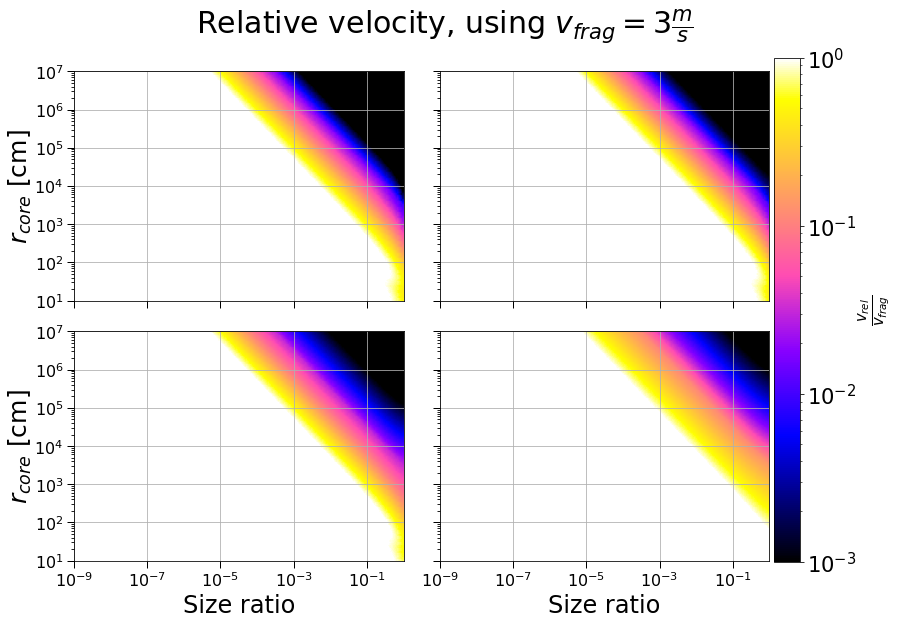

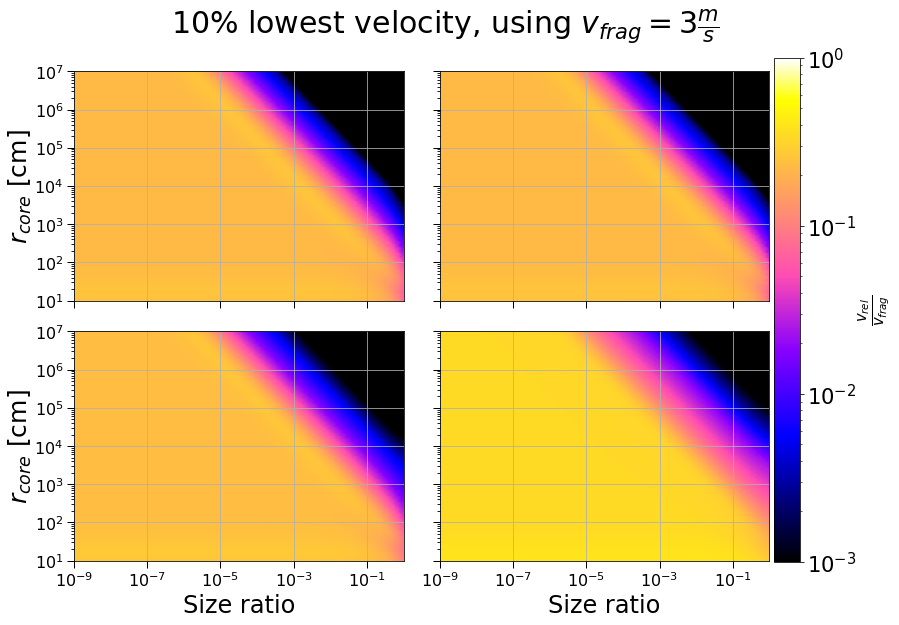

In [17]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth * rho_int/(4 * np.pi * 2))**(1/3)
cmap = 'gnuplot2'

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e10)
#    T = 200*semi_maj**(-3./7.)
#    c_s = np.sqrt(fn.k*T/fn.mu)
#    om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
#    vk = semi_maj*fn.au*om
#    eta = c_s**2./2./vk**2.

    plt.xscale('log')
    plt.yscale('log')
    #plt.ylim(1e3,1e8)
    #plt.xlim(1e-12,1e0)
    plt.ylim(1e1,1e7)
    plt.xlim(1e-9,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("a = 10 AU, varying turbulence levels", size=30);
plt.savefig('t_growth.pdf')
plt.show()

fig = plt.figure(1,figsize=(12,9))
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,v_rel_array[:,:,j]/1e3, cmap=cmap,norm=LogNorm(),vmin=1e-3,vmax=1e0)

    plt.xscale('log')
    plt.yscale('log')
    #plt.ylim(1e3,1e8)
    #plt.xlim(1e-12,1e0)
    plt.ylim(1e1,1e7)
    plt.xlim(1e-9,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$\frac{v_{rel}}{v_{frag}}$',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle(r"Relative velocity, using $v_{frag} = 3 \frac{m}{s}$", size=30);
plt.savefig('relative_velocity.pdf')
plt.show()

fig = plt.figure(1,figsize=(12,9))
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,v_low_array[:,:,j]/3e3, cmap=cmap,norm=LogNorm(),vmin=1e-3,vmax=1e0)

    plt.xscale('log')
    plt.yscale('log')
    #plt.ylim(1e3,1e8)
    #plt.xlim(1e-12,1e0)
    plt.ylim(1e1,1e7)
    plt.xlim(1e-9,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$\frac{v_{rel}}{v_{frag}}$',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle(r"10% lowest velocity, using $v_{frag} = 3 \frac{m}{s}$", size=30);
plt.savefig('lowest_velocity.pdf')
plt.show()

In [23]:
# Pick one mass, and plot a variety of things across size ratio
M = 1e-16 # Earth masses, should be around 10^4 cm (10 meters)
ratio_array = np.logspace(-9, 0, 300) #ratio_array = np.logspace(-16,0,300)
t_growth_array = np.zeros([ratio_array.size, 5])
v_rel_array = np.zeros([ratio_array.size, 5])
rho_solid_array = np.zeros([ratio_array.size, 5])
cross_sec_array = np.zeros([ratio_array.size, 5])
ke_array = np.zeros([ratio_array.size, 5])
work_array = np.zeros([ratio_array.size, 5])
r_stab_array = np.zeros([ratio_array.size, 5])
r_bondi_array = np.zeros([ratio_array.size, 5])
r_phys_array = np.zeros([ratio_array.size, 5])
semi_maj = 10
rho_int = 1.6

# Calculating the bottom 10% velocities from Maxwellian distributions
v_low_array = np.zeros([ratio_array.size, 5])

# Initializes the core objects
core_lam = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
            sol_gas_ratio=.01, rho_core=5.51)
m_core = M * fn.m_earth
r_core = ((3 * m_core)/(4 * np.pi * rho_int))**(1/3)

for i, r in enumerate(ratio_array):
    s = r * r_core
    core_lam.main(s)

    t_growth_array[i, 0] = core_lam.t_acc

    if core_lam.r_stab > core_lam.r_bondi and core_lam.work_enc < core_lam.ke:
        frac = 0.0001
        vel_low = maxwell.ppf(frac, loc=0, scale=np.sqrt(np.pi/2)*core_lam.v_obj_core_lam/2)
        np.maximum(v_obj_core, core_lam.v_shear)
        if (.5 * core_lam.m_obj * vel_low**2) < core_lam.work_enc:
            test = True
            while test and frac < 1:
                KE = .5 * core_lam.m_obj * vel_low**2
                if work < KE: # When the work is no longer sufficient to stop the particle, 
                    test = False
                    #print("Success!", frac)
                    break
                # Draws the relative velocity between particles from a distribution, allowing this to approach 0
                v_obj_core_lam = maxwell.ppf(frac, loc=0, scale=np.sqrt(np.pi/2)*core_lam.v_obj_core_lam/2)
                v_obj_core = np.sqrt(v_obj_core_lam**2 + core_lam.v_obj_core_turb**2)
                # Does not update the object gas velocity, keeping the gas drag/work constant
                v_obj_gas = core_lam.v_obj_gas
                vel_low = np.maximum(v_obj_core, core_lam.v_shear)
                frac = 1.1*frac # increase each time
                #print(frac, KE, work)
            t_growth_array[i, 0] = core_lam.t_acc/(frac/1.1) # Uses the frac value that last worked
        else:
            t_growth_array[i, 0] = 0


    v_rel_array[i,0] = core_lam.v_inf
    
    v_low_array[i,0] = maxwell.ppf(0.1, loc=0, scale=np.sqrt(np.pi/2)*v_rel_array[i,0]/2) # Should return the 10% low end of velocity
    
    rho_solid_array[i,0] = core_lam.sig_solid/(2 * core_lam.H_disk)
    cross_sec_array[i,0] = core_lam.area_acc
    ke_array[i,0] = core_lam.ke
    work_array[i,0] = core_lam.work_enc
    r_stab_array[i,0] = core_lam.r_stab
    r_bondi_array[i,0] = core_lam.r_bondi
    r_phys_array[i,0] = core_lam.r_core
    
fig = plt.figure(1,figsize=(12,9))
#plt.loglog(ratio_array, rho_solid_array[:,0], label='Solids density')
#plt.loglog(ratio_array, cross_sec_array[:,0], label='Cross Section')
#plt.loglog(ratio_array, v_rel_array[:,0], label='Relative Velocity')
plt.loglog(ratio_array, t_growth_array[:,0], label='Growth time')
plt.loglog(ratio_array, ke_array[:,0], label='Kinetic Energy')
plt.loglog(ratio_array, work_array[:,0], label='Work done')
plt.loglog(ratio_array, r_stab_array[:,0], label='Stable radius')
plt.loglog(ratio_array, r_bondi_array[:,0], label='Bondi radius')
plt.loglog(ratio_array, r_phys_array[:,0], label='Physical radius')
plt.xlabel('Ratio Array')
plt.suptitle('For a = 10, M_core = 10^-16 M_earth')
plt.legend()

NameError: name 'work' is not defined

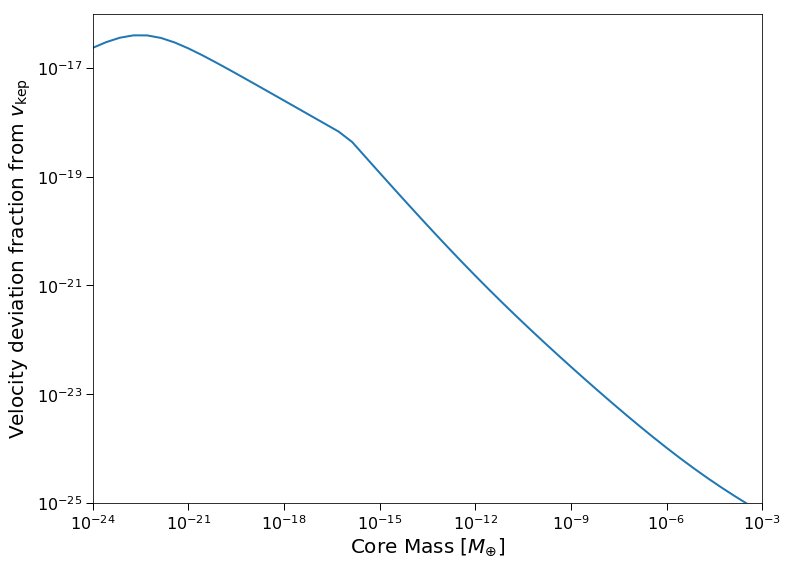

In [53]:
m_star = 1 # solar masses
m_array = np.logspace(-24,-3)
rho_int = 5.51
T_0 = 82

a_au = 10
v_dev_array = np.zeros([m_array.size])
v_kep = np.sqrt(fn.G * m_star * fn.m_sun/(a_au * fn.au))
temp = T_0*a_au**(-3./7.)
c_s = fn.sound_speed(temp)
v_k = fn.vkep(m_star*fn.m_sun, a_au)
eta = fn.eta(c_s, v_k)

for j, M in enumerate(m_array):
    r_core = (3/(4 * np.pi) * M * fn.m_earth/rho_int)**(1/3)
    st = st_rad(rad=r_core, a_au=a_au)
    v_dev_array[j] = 2 * eta * st/(1 + st**2) #(1 - 1/(1+st**2))

fig = plt.figure(1,figsize=(12,9))
plt.loglog(m_array, v_dev_array, linewidth=2)
plt.xlabel(r'Core Mass [$M_{\oplus}$]', size=20)
plt.ylabel('Velocity deviation fraction from $v_\mathrm{kep}$', size=20)
plt.xlim(1e-24,1e-3)
plt.ylim(1e-25,1e-16)
plt.tick_params(which='major', length=7,width=1.0, labelsize=16)
plt.tick_params(which='minor', length=3.0,width=0.85)
plt.savefig('v_dev.pdf')

## Section with proper gravitational focussing

In [55]:
import disk as dk
# Forget all this junk, let's just try putting in the Gravitational Focusing using the outputs from the models
# At 10 AU, for laminar, alpha 10^-5, 10^-4, and 10^-3
m_array = np.logspace(-26, 0, 300) #m_array = np.logspace(-25,0,300)
ratio_array = np.logspace(-16, 0, 300) #ratio_array = np.logspace(-16,0,300)
t_growth_cb = np.zeros([m_array.size, ratio_array.size, 5])
v_rel_array = np.zeros([m_array.size, ratio_array.size, 5])
st_arr = np.zeros(ratio_array.size)
semi_maj = np.array([10])
rho_int = 1.6

# Calculating the bottom 10% velocities from Maxwellian distributions
from scipy.stats import maxwell
v_low_array = np.zeros([m_array.size,  ratio_array.size, 5])
t_growth_low = np.zeros(t_growth_cb.shape)

t_array = np.array([0.8]) * 3.154e13
eps_p = 0.5
eps_d = 0.5/10 #Growth efficiency, eps_d = eps_g,d/xi from eqn ~9 of LJ14
delt = 3/7 # Constant on drift velocity
Lamb = 47/14 # Constant on t_grow = Lamb * t_drift
f_d = 1e-2 # Initial dust to gas ratio
params = 82, 0.8, 175, 30, 1.6, 1e-4, f_d, eps_p, eps_d, delt, Lamb # TW Hya params
sd = dk.surface_density(semi_maj, t_array, params)
Sig_gas = sd[0]
sig_d_array = sd[1]

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a5 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a4 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a3 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_a2 = Core(a_core_au=semi_maj, m_core_earthmasses=M, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * rho_int))**(1/3)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        st_arr[i] = st_rad(rad=s, a_au=semi_maj)
        core_lam.main(s)
        core_a5.main(s)
        core_a4.main(s)
        core_a3.main(s)
        core_a2.main(s)
        
        t_growth_cb[j, i, 0] = core_lam.t_acc
        t_growth_cb[j, i, 1] = core_a5.t_acc
        t_growth_cb[j, i, 2] = core_a4.t_acc
        t_growth_cb[j, i, 3] = core_a3.t_acc
        t_growth_cb[j, i, 4] = core_a2.t_acc
        
        v_rel_array[j,i,0] = core_lam.v_obj_core
        v_rel_array[j,i,1] = core_a5.v_obj_core
        v_rel_array[j,i,2] = core_a4.v_obj_core
        v_rel_array[j,i,3] = core_a3.v_obj_core
        v_rel_array[j,i,4] = core_a2.v_obj_core
         
        for k in range(5):
            v_low_array[j,i,k] = maxwell.ppf(0.1, loc=0, scale=np.sqrt(np.pi/2)*v_rel_array[j,i,k]/2) # Should return the 10% low end of velocity

        #"""
        if (core_lam.r_stab > core_lam.r_bondi and core_lam.work_enc < core_lam.ke):
            v_esc = np.sqrt(2 * fn.G * m_core/r_core)
            bGF = r_core * (1 + (v_esc/core_lam.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_lam.H_disk,bGF)
            t_growth_cb[j, i, 0] = fn.sec_to_years * m_core/(core_lam.sig_solid/(2 * core_lam.H_disk) * core_lam.v_inf * sig_acc)
        if (core_a5.r_stab > core_a5.r_bondi and core_a5.work_enc < core_a5.ke):
            bGF = r_core * (1 + (v_esc/core_a5.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a5.H_disk,bGF)
            t_growth_cb[j, i, 1] = fn.sec_to_years * m_core/(core_a5.sig_solid/(2 * core_a5.H_disk) * core_a5.v_inf * sig_acc)
        if (core_a4.r_stab > core_a4.r_bondi and core_a4.work_enc < core_a4.ke):
            bGF = r_core * (1 + (v_esc/core_a4.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a4.H_disk,bGF)
            t_growth_cb[j, i, 2] = fn.sec_to_years * m_core/(core_a4.sig_solid/(2 * core_a4.H_disk) * core_a4.v_inf * sig_acc)
        if (core_a3.r_stab > core_a3.r_bondi and core_a3.work_enc < core_a3.ke):
            bGF = r_core * (1 + (v_esc/core_a3.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a3.H_disk,bGF)
            t_growth_cb[j, i, 3] = fn.sec_to_years * m_core/(core_a3.sig_solid/(2 * core_a3.H_disk) * core_a3.v_inf * sig_acc)
        if (core_a2.r_stab > core_a2.r_bondi and core_a2.work_enc < core_a2.ke):
            bGF = r_core * (1 + (v_esc/core_a2.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a2.H_disk,bGF)
            t_growth_cb[j, i, 4] = fn.sec_to_years * m_core/(core_a2.sig_solid/(2 * core_a2.H_disk) * core_a2.v_inf * sig_acc)
            
        """
        v_ratio = (v_low_array[j,i,k]/v_rel_array[j,i,k])
        if (core_lam.r_stab > core_lam.r_bondi and core_lam.work_enc * v_ratio < core_lam.ke * v_ratio**2):
            v_esc = np.sqrt(2 * fn.G * m_core/r_core)
            bGF = r_core * (1 + (v_esc/core_lam.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_lam.H_disk,bGF)
            t_growth_cb[j, i, 0] = 0 #fn.sec_to_years * m_core/(core_lam.sig_solid/(2 * core_lam.H_disk) * core_lam.v_inf * sig_acc)
        if (core_a5.r_stab > core_a5.r_bondi and core_a5.work_enc * v_ratio < core_a5.ke * v_ratio**2):
            bGF = r_core * (1 + (v_esc/core_a5.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a5.H_disk,bGF)
            t_growth_cb[j, i, 1] = 0 #fn.sec_to_years * m_core/(core_a5.sig_solid/(2 * core_a5.H_disk) * core_a5.v_inf * sig_acc)
        if (core_a4.r_stab > core_a4.r_bondi and core_a4.work_enc * v_ratio < core_a4.ke * v_ratio**2):
            bGF = r_core * (1 + (v_esc/core_a4.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a4.H_disk,bGF)
            t_growth_cb[j, i, 2] = 0 #fn.sec_to_years * m_core/(core_a4.sig_solid/(2 * core_a4.H_disk) * core_a4.v_inf * sig_acc)
        if (core_a3.r_stab > core_a3.r_bondi and core_a3.work_enc * v_ratio < core_a3.ke * v_ratio**2):
            bGF = r_core * (1 + (v_esc/core_a3.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a3.H_disk,bGF)
            t_growth_cb[j, i, 3] = 0 #fn.sec_to_years * m_core/(core_a3.sig_solid/(2 * core_a3.H_disk) * core_a3.v_inf * sig_acc)
        if (core_a2.r_stab > core_a2.r_bondi and core_a2.work_enc * v_ratio < core_a2.ke * v_ratio**2):
            bGF = r_core * (1 + (v_esc/core_a2.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a2.H_disk,bGF)
            t_growth_cb[j, i, 4] = 0 #fn.sec_to_years * m_core/(core_a2.sig_solid/(2 * core_a2.H_disk) * core_a2.v_inf * sig_acc)
            #"""
            
t_growth_low = t_growth_cb * (v_rel_array[j,i]/v_low_array[j,i])

In [29]:
# Forget all this junk, let's just try putting in the Gravitational Focusing using the outputs from the models
# At 10 AU, for laminar, alpha 10^-5, 10^-4, and 10^-3
# Nevermind, switch to alpha 10^-4 with four different distances: 10, 30, 50, 100 AU
m_array = np.logspace(-26, 0, 300) #m_array = np.logspace(-25,0,300)
ratio_array = np.logspace(-16, 0, 300) #ratio_array = np.logspace(-16,0,300)
t_growth_cb = np.zeros([m_array.size, ratio_array.size, 4])
v_rel_array = np.zeros([m_array.size, ratio_array.size, 4])
st_arr = np.zeros([ratio_array.size,4])
semi_maj = np.array([5,10,30,50])
rho_int = 1.6

# Calculating the bottom 10% velocities from Maxwellian distributions
from scipy.stats import maxwell
v_low_array = np.zeros([m_array.size,  ratio_array.size, 4])
t_growth_low = np.zeros(t_growth_cb.shape)

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_0 = Core(a_core_au=semi_maj[0], m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_1 = Core(a_core_au=semi_maj[1], m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_2 = Core(a_core_au=semi_maj[2], m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    core_3 = Core(a_core_au=semi_maj[3], m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51, sig_g_in=Sig_gas, sig_p_in=sig_d_array)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * rho_int))**(1/3)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        st_arr[i,0] = st_rad(rad=s, a_au=semi_maj[0])
        st_arr[i,1] = st_rad(rad=s, a_au=semi_maj[1])
        st_arr[i,2] = st_rad(rad=s, a_au=semi_maj[2])
        st_arr[i,3] = st_rad(rad=s, a_au=semi_maj[3])
        core_0.main(s)
        core_1.main(s)
        core_2.main(s)
        core_3.main(s)
        
        t_growth_cb[j, i, 0] = core_0.t_acc
        t_growth_cb[j, i, 1] = core_1.t_acc
        t_growth_cb[j, i, 2] = core_2.t_acc
        t_growth_cb[j, i, 3] = core_3.t_acc
        
        v_rel_array[j,i,0] = core_0.v_obj_core
        v_rel_array[j,i,1] = core_1.v_obj_core
        v_rel_array[j,i,2] = core_2.v_obj_core
        v_rel_array[j,i,3] = core_3.v_obj_core
         
        for k in range(4):
            v_low_array[j,i,k] = maxwell.ppf(0.1, loc=0, scale=np.sqrt(np.pi/2)*v_rel_array[j,i,k]/2) # Should return the 10% low end of velocity
        
        # Try to modify t_growth by (v_rel_array/v_low_array)
        #t_growth_low[j,i] = t_growth_cb[j,i] * (v_rel_array[j,i]/v_low_array[j,i])
        """
        if (core_0.r_stab > core_0.r_bondi and core_0.work_enc < core_0.ke):
            v_esc = np.sqrt(2 * fn.G * m_core/r_core)
            bGF = r_core * (1 + (v_esc/core_lam.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_lam.H_disk,bGF)
            t_growth_cb[j, i, 0] = 0 #fn.sec_to_years * m_core/(core_lam.sig_solid/(2 * core_lam.H_disk) * core_lam.v_inf * sig_acc)
        if (core_1.r_stab > core_1.r_bondi and core_1.work_enc < core_1.ke):
            bGF = r_core * (1 + (v_esc/core_a5.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a5.H_disk,bGF)
            t_growth_cb[j, i, 1] = 0 #fn.sec_to_years * m_core/(core_a5.sig_solid/(2 * core_a5.H_disk) * core_a5.v_inf * sig_acc)
        if (core_2.r_stab > core_2.r_bondi and core_2.work_enc < core_2.ke):
            bGF = r_core * (1 + (v_esc/core_a4.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a4.H_disk,bGF)
            t_growth_cb[j, i, 2] = 0 #fn.sec_to_years * m_core/(core_a4.sig_solid/(2 * core_a4.H_disk) * core_a4.v_inf * sig_acc)
        if (core_3.r_stab > core_3.r_bondi and core_3.work_enc < core_3.ke):
            bGF = r_core * (1 + (v_esc/core_a3.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a3.H_disk,bGF)
            t_growth_cb[j, i, 3] = 0 #fn.sec_to_years * m_core/(core_a3.sig_solid/(2 * core_a3.H_disk) * core_a3.v_inf * sig_acc)
            """
        if (core_0.r_stab > core_0.r_bondi and core_0.work_enc * (v_low_array[j,i,k]/v_rel_array[j,i,k]) < core_0.ke * (v_low_array[j,i,k]/v_rel_array[j,i,k])**2):
            v_esc = np.sqrt(2 * fn.G * m_core/r_core)
            bGF = r_core * (1 + (v_esc/core_lam.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_lam.H_disk,bGF)
            t_growth_cb[j, i, 0] = 0 #fn.sec_to_years * m_core/(core_lam.sig_solid/(2 * core_lam.H_disk) * core_lam.v_inf * sig_acc)
        if (core_1.r_stab > core_1.r_bondi and core_1.work_enc * (v_low_array[j,i,k]/v_rel_array[j,i,k]) < core_1.ke * (v_low_array[j,i,k]/v_rel_array[j,i,k])**2):
            bGF = r_core * (1 + (v_esc/core_a5.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a5.H_disk,bGF)
            t_growth_cb[j, i, 1] = 0 #fn.sec_to_years * m_core/(core_a5.sig_solid/(2 * core_a5.H_disk) * core_a5.v_inf * sig_acc)
        if (core_2.r_stab > core_2.r_bondi and core_2.work_enc * (v_low_array[j,i,k]/v_rel_array[j,i,k]) < core_2.ke * (v_low_array[j,i,k]/v_rel_array[j,i,k])**2):
            bGF = r_core * (1 + (v_esc/core_a4.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a4.H_disk,bGF)
            t_growth_cb[j, i, 2] = 0 #fn.sec_to_years * m_core/(core_a4.sig_solid/(2 * core_a4.H_disk) * core_a4.v_inf * sig_acc)
        if (core_3.r_stab > core_3.r_bondi and core_3.work_enc * (v_low_array[j,i,k]/v_rel_array[j,i,k]) < core_3.ke * (v_low_array[j,i,k]/v_rel_array[j,i,k])**2):
            bGF = r_core * (1 + (v_esc/core_a3.v_inf)**2.)**(0.5)
            sig_acc = 4*bGF*min(core_a3.H_disk,bGF)
            t_growth_cb[j, i, 3] = 0 #fn.sec_to_years * m_core/(core_a3.sig_solid/(2 * core_a3.H_disk) * core_a3.v_inf * sig_acc)
        #"""    
t_growth_low = t_growth_cb * (v_rel_array[j,i]/v_low_array[j,i])

In [36]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth * rho_int/(4 * np.pi * 2))**(1/3)
cmap = 'gnuplot2'

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e10)
    #im = plt.pcolormesh(X,Y,t_growth_low[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e1,1e8)
    plt.xlim(1e-12,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    ax.fill([1e-12,1e-4,1e-12], [1e7,1e1,1e1], color="grey", alpha=0.8) 
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
#fig.suptitle(r"$\alpha = 10^{-5}$, low velocity, varying orbital distance", size=30);
fig.suptitle("a = 10 AU, varying turbulence strength", size=30);
plt.savefig('t_growth_full_turb.pdf')
plt.show()

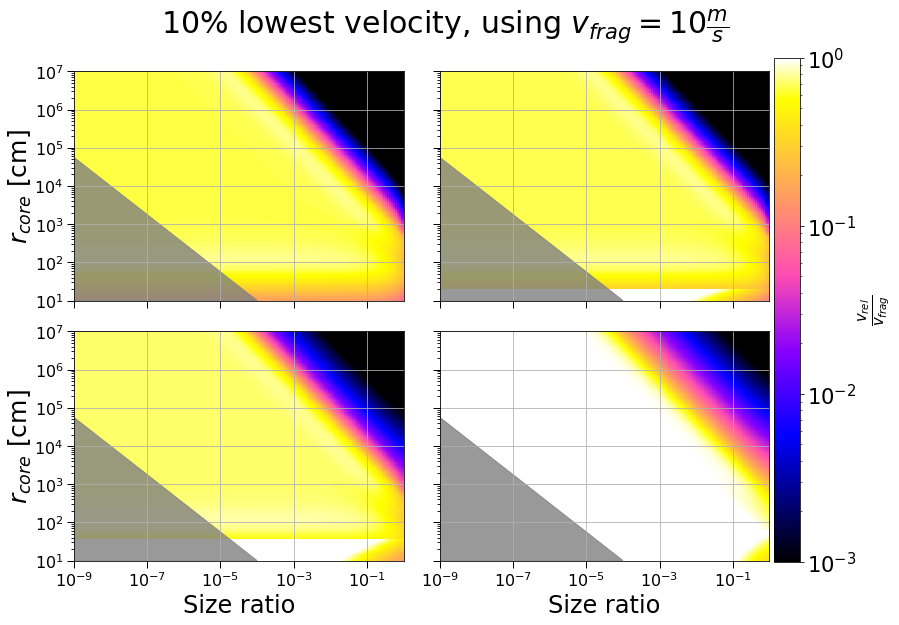

In [56]:
# Making the relative velocity plots
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth * rho_int/(4 * np.pi * 2))**(1/3)

fig = plt.figure(1,figsize=(12,9))
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,v_rel_array[:,:,j]/1e3, cmap=cmap,norm=LogNorm(),vmin=1e-3,vmax=1e0)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e1,1e7)
    plt.xlim(1e-9,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    ax.fill([1e-12,1e-4,1e-12], [1e7,1e1,1e1], color="grey", alpha=0.8)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$\frac{v_{rel}}{v_{frag}}$',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle(r"Relative velocity, using $v_{frag} = 10 \frac{m}{s}$", size=30);
plt.savefig('relative_velocity.pdf')
plt.show()

fig = plt.figure(1,figsize=(12,9))
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,v_low_array[:,:,j]/1e3, cmap=cmap,norm=LogNorm(),vmin=1e-3,vmax=1e0)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e1,1e7)
    plt.xlim(1e-9,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    ax.fill([1e-12,1e-4,1e-12], [1e7,1e1,1e1], color="grey", alpha=0.8)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$\frac{v_{rel}}{v_{frag}}$',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle(r"10% lowest velocity, using $v_{frag} = 10 \frac{m}{s}$", size=30);
plt.savefig('lowest_velocity.pdf')
plt.show()

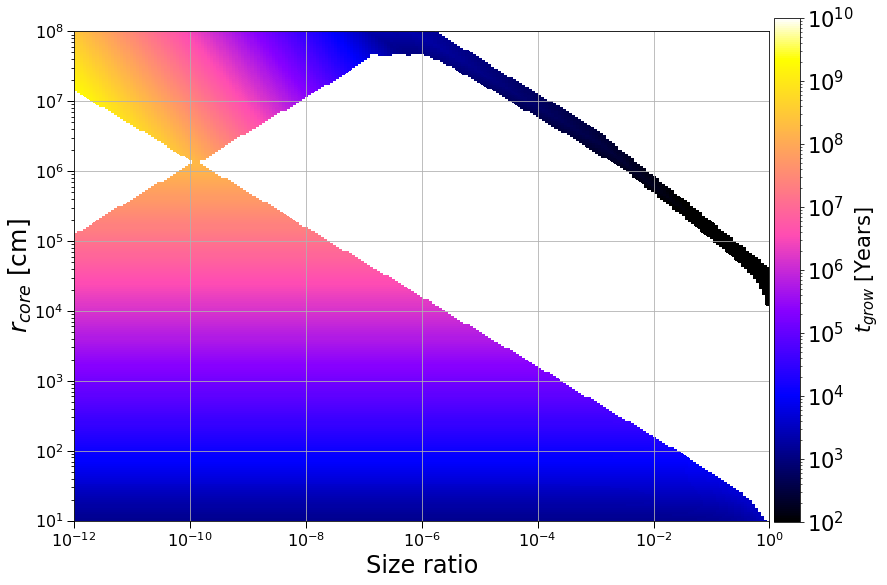

In [45]:
fig = plt.figure(1,figsize=(12,9))

X, Y = np.meshgrid(ratio_array, r_array)
im = plt.pcolormesh(X,Y,t_growth_cb[:,:,0], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e10)
    #im = plt.pcolormesh(X,Y,t_growth_low[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e10)

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e1,1e8)
plt.xlim(1e-12,1e0)
    
im.set_edgecolor('face')
ax = plt.gca()
ax.tick_params(labelsize=16, which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)
ax.grid()
plt.xlabel('Size ratio',fontsize=24)
plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
plt.savefig('t_growth_single.pdf')
plt.show()

In [18]:
def F_col(x, ang):
    if x < 1 and x > np.sqrt(ang):
        return x**2
    elif x < np.sqrt(ang) and x > ang:
        return ang**(-1/2) * x**(-1)
    else:
        return ang**(-3/2)

In [19]:
m_array = np.logspace(-26,0,300)
ratio_array = np.logspace(-16,1,300)
t_growth_1au= np.zeros([m_array.size, ratio_array.size, 4])
v_rel_arr = np.zeros([m_array.size, ratio_array.size, 4])
v_core_kep = np.zeros([m_array.size, ratio_array.size])
ratio_grid = np.zeros([m_array.size, s_array.size])

a = 1
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
ang = (1/1)**(1/3) * fn.r_sun/(a*fn.au) # a_core = 1 AU, 1/1 ratio is rho_star/rho_core

T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
vth = fn.therm_vel(c_s)
H_g = c_s/om
Sig_gas = core_lam.sig_gas
f_s = 1e-2
rho_g = Sig_gas/2./H_g
rho_s = 5.51 #2.

v_turb_arr = np.zeros([m_array.size, ratio_array.size])
st_arr = np.zeros([m_array.size, ratio_array.size])
H_acc_arr = np.zeros([m_array.size, ratio_array.size,4])
sigma_arr = np.zeros([m_array.size, ratio_array.size,4])
sigma_PA_arr = np.zeros([m_array.size, ratio_array.size])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=f_s, rho_core=5.51)
    core_a5 = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=f_s, rho_core=5.51)

In [20]:
m_array = np.logspace(-26,0,300)
ratio_array = np.logspace(-16,1,300)
t_growth_1au= np.zeros([m_array.size, ratio_array.size, 4])
v_rel_arr = np.zeros([m_array.size, ratio_array.size, 4])
v_core_kep = np.zeros([m_array.size, ratio_array.size])
ratio_grid = np.zeros([m_array.size, s_array.size])

a = 1
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
ang = (1/1)**(1/3) * fn.r_sun/(a*fn.au) # a_core = 1 AU, 1/1 ratio is rho_star/rho_core

T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
v0 = eta * vk
vth = fn.therm_vel(c_s)
H_g = c_s/om
Sig_gas = core_lam.sig_gas
f_s = 1e-2
rho_g = Sig_gas/2./H_g
rho_s = 5.51 #2.
rho_int = 1.6

v_turb_arr = np.zeros([m_array.size, ratio_array.size])
st_arr = np.zeros([m_array.size, ratio_array.size])
H_acc_arr = np.zeros([m_array.size, ratio_array.size,4])
sigma_arr = np.zeros([m_array.size, ratio_array.size,6])
rho_s_arr = np.zeros([m_array.size, ratio_array.size])
b_arr = np.zeros([m_array.size, ratio_array.size,2])
v_arr = np.zeros([m_array.size, ratio_array.size,4])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=f_s, rho_core=rho_s)
    core_a5 = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=f_s, rho_core=rho_s)
    core_a4 = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=f_s, rho_core=rho_s)
    core_a3 = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=f_s, rho_core=rho_s)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * rho_int))**(1/3)
    r_hill = fn.hill_rad(m_core, a*fn.au, fn.m_sun)
    v_esc = np.sqrt(2 * fn.G * m_core/r_core)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        m = 4/3 * np.pi * s**3 * rho_s
        
        core_lam.main(s, rho_obj=5.51)
        core_a5.main(s, rho_obj=5.51)
        core_a4.main(s, rho_obj=5.51)
        core_a3.main(s, rho_obj=5.51)
        
        t_growth_1au[j, i, 0] = core_lam.t_acc
        t_growth_1au[j, i, 1] = core_a5.t_acc
        t_growth_1au[j, i, 2] = core_a4.t_acc
        t_growth_1au[j, i, 3] = core_a3.t_acc
        
        v_rel_arr[j,i,0] = core_lam.v_obj_core
        v_rel_arr[j,i,1] = core_a5.v_obj_core
        v_rel_arr[j,i,2] = core_a4.v_obj_core
        v_rel_arr[j,i,3] = core_a3.v_obj_core
        
        alph = 1e-100
        st = core_lam.tau_s #st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=Sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = core_lam.H_disk #max(H_turb,H_KH)
        sig_p = core_lam.sig_solid #f_s * sig_gas
        rho_solid = sig_p/2./H_p
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        v_inf = v_rel_arr[j, i, 0] #max(v_turb,v_lam) #r_hill * om
        bGF = r_core * (1 + (v_esc/v_inf)**2.)**(0.5)
        H_acc = min(H_p,bGF)
        sig_acc = 4*bGF*H_acc
        
        v_arr[j,i,0] = v0
        v_arr[j,i,1] = v_lam
        v_arr[j,i,2] = v_turb
        v_arr[j,i,3] = ((m_core)/(3 * fn.m_sun))**(1/3) * om
        
        v_turb_arr[j,i] = v_turb
        st_arr[j,i] = st
        b_arr[j,i,0] = bGF
        b_arr[j,i,1] = r_core
        H_acc_arr[j,i,0] = H_p
        H_acc_arr[j,i,1] = H_acc
        H_acc_arr[j,i,2] = core_lam.H_disk
        H_acc_arr[j,i,3] = core_lam.H_acc
        sigma_arr[j,i,0] = sig_acc
        sigma_arr[j,i,1] = 4*bGF**2
        sigma_arr[j,i,2] = 4*bGF*H_p
        sigma_arr[j,i,3] = 4*H_acc * r_hill
        sigma_arr[j,i,4] = 4*H_acc * core_lam.r_ws
        sigma_arr[j,i,5] = 4*H_acc * core_lam.r_sh
        #sigma_PA_arr[j,i] = core_lam.area_acc
        rho_s_arr[j,i] = rho_solid
        
        v_alph = np.sqrt(alph/st) * vk
        v_eta = np.sqrt(eta/st) * vk
        v_vert = np.maximum(v_alph, v_eta)
        
        m_dot = rho_solid * sig_acc * v_inf
        t_GF = m_core/m_dot
        for k in range(len(alph_arr)):
            if t_growth_1au[j,i,k] == 0:
                t_GF_Ruth = (om*r_hill)**2/(v_rel_arr[j,i,k] * v_vert) * rho_s * r_core**2 / (f_s * Sig_gas * om * r_hill)
                #print(t_GF, t_GF_Ruth)
                t_growth_1au[j,i,k] = t_GF_Ruth * fn.sec_to_years #t_GF_GLS*fn.sec_to_years
        
        #if t_growth_1au[j, i, 0] != 0:
        #    v_rel_array[j, i, 0] = core_lam.v_obj_core
        #else:
        #    v_rel_array[j, i, 0] = r_hill * om
        #if t_growth_1au[j, i, 1] != 0:
        #    v_rel_array[j, i, 1] = core_a5.v_obj_core
        #else:
        #    v_rel_array[j, i, 1] = r_hill * om
        #if t_growth_1au[j, i, 2] != 0:
        #    v_rel_array[j, i, 2] = core_a4.v_obj_core
        #else:
        #    v_rel_array[j, i, 2] = r_hill * om
        #if t_growth_1au[j, i, 3] != 0:
        #    v_rel_array[j, i, 3] = core_a3.v_obj_core
        #else:
        #    v_rel_array[j, i, 3] = r_hill * om
        #if t_growth_1au[j, i, 4] != 0:
        #    v_rel_array[j, i, 4] = core_a2.v_obj_core
        #else:
        #    v_rel_array[j, i, 4] = r_hill * om

In [22]:
fig = plt.figure(1,figsize=(13,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    #r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    #r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(y1), st_rad(y2))
    ax_r.figure.canvas.draw()

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_1au[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e7)
    T = 200*(a**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.
    v_H = ((m_array * fn.m_earth)/(3 * fn.m_sun))**(1/3) * om
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e9)
    plt.xlim(1e-14,1e0)
    #plt.ylim(1e2,1e5)
    #plt.xlim(1e-2,1e1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid(which='major')
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
        
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e0,1e9)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.113, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

cb.ax.tick_params(labelsize=21)
#plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
plt.subplots_adjust(left=0.030,right=0.875,hspace=0.25,wspace=0.2)
#plt.savefig('Size_ratio.png')


1.0884019160690077e-12


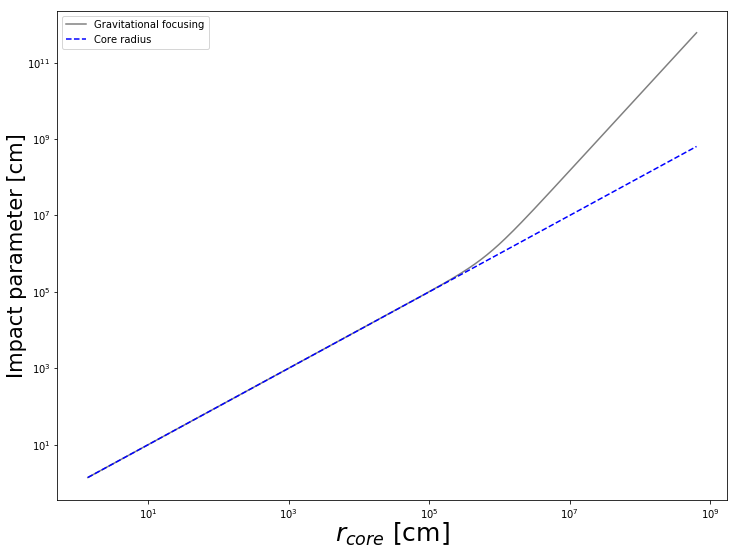

In [23]:
print(ratio_array[71])
fig = plt.figure(1,figsize=(12,9))
plt.loglog(r_array, t_growth_1au[:,71,0])
plt.ylabel(r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
plt.xlabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.05)
plt.show()

fig = plt.figure(1,figsize=(12,9))
plt.loglog(r_array, sigma_arr[:, 71, 0], 'g--', label='Accretion cross section')
plt.loglog(r_array, v_rel_arr[:, 71, 0], 'm--', label='Relative velocity')
plt.loglog(r_array, rho_s_arr[:, 71], 'r--', label='Planetesimal spacial density')
plt.loglog(r_array, sigma_arr[:, 71, 0]*v_rel_arr[:, 71, 0]*rho_s_arr[:, 71], 'k--', label='Mass accretion rate')
plt.loglog(r_array, m_array*fn.m_earth, 'y--', label='Planetesimal mass') 
plt.loglog(r_array, m_array*fn.m_earth/(sigma_arr[:, 71, 0]*v_rel_arr[:, 71, 0]*rho_s_arr[:, 71]), 'k-', label='Growth time')
plt.xlabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.05)
plt.legend()
plt.show()

fig = plt.figure(1,figsize=(12,9))
plt.loglog(r_array, v_arr[:, 71, 0], 'g--', label='V_0')
plt.loglog(r_array, v_arr[:, 71, 1], 'r--', label='Laminar velocity')
plt.loglog(r_array, v_rel_arr[:, 71, 2], 'y--', label='Turbulent velocity')
plt.loglog(r_array, v_arr[:, 71, 3], 'b--', label='Hill velocity')
plt.loglog(r_array, v_rel_arr[:, 71, 0], 'k--', label='Relative velocity')
plt.xlabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.05)
plt.ylabel(r'$v$ [$cm^2$]',fontsize=21,labelpad=0.1)
plt.legend()
plt.show()

fig = plt.figure(1,figsize=(12,9))
plt.loglog(r_array, sigma_arr[:, 71, 0], 'k-', alpha=0.5, label='Accretion cross section')
plt.loglog(r_array, sigma_arr[:, 71, 1], 'b--', label='3D cross section')
plt.loglog(r_array, sigma_arr[:, 71, 2], 'g--', label='2D cross section')
plt.loglog(r_array, sigma_arr[:, 71, 3], 'm--', label='Hill cross section')
plt.loglog(r_array, sigma_arr[:, 71, 4], 'y--', label='WISH cross section')
plt.loglog(r_array, sigma_arr[:, 71, 5], 'r--', label='Shear cross section')
plt.xlabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.05)
plt.ylabel(r'$\sigma$ [$cm^2$]',fontsize=21,labelpad=0.1)
plt.legend()
plt.show()

fig = plt.figure(1,figsize=(12,9))
plt.loglog(r_array, H_acc_arr[:, 71, 1], 'k-', alpha=0.5, label='Accretion scale height')
plt.loglog(r_array, H_acc_arr[:, 71, 0], 'b--', label='Particle scale height')
plt.loglog(r_array, H_acc_arr[:, 71, 2], 'g--', label='Disk scale height')
plt.loglog(r_array, H_acc_arr[:, 71, 3], 'r--', label='Accretion scale height (from core object)')
plt.xlabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.05)
plt.ylabel('Scale height [cm]',fontsize=21,labelpad=0.1)
plt.legend()
plt.show()

fig = plt.figure(1,figsize=(12,9))
plt.loglog(r_array, b_arr[:, 71, 0], 'k-', alpha=0.5, label='Gravitational focusing')
plt.loglog(r_array, b_arr[:, 71, 1], 'b--', label='Core radius')
plt.xlabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.05)
plt.ylabel('Impact parameter [cm]',fontsize=21,labelpad=0.1)
plt.legend()
plt.show()

983548.8252145114


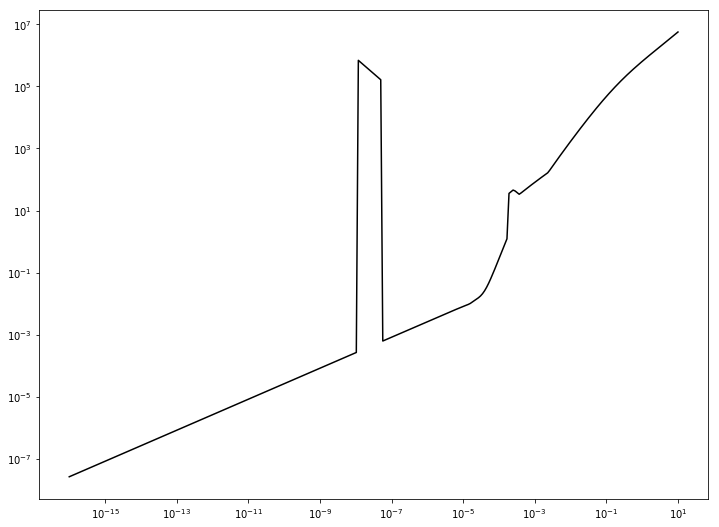

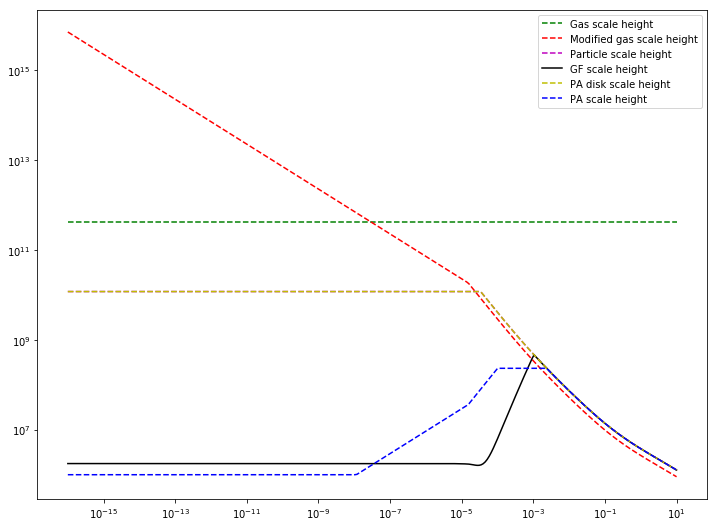

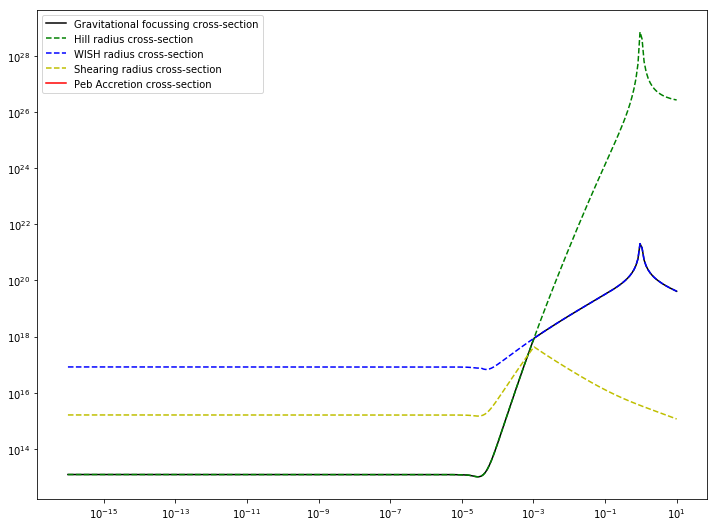

In [24]:
# M_dot ~ rho * sigma * v
j = 202 # Choose M_core ~ 1e-8 M_earth
print((3/(4 * np.pi) * m_array[j]*fn.m_earth/rho_s)**(1/3))

fig = plt.figure(1,figsize=(12,9))
plt.loglog(ratio_array, t_growth_1au[j,:,0], 'k-')
plt.show()

# Rho ~ Sigma/H
# Plots of H
fig = plt.figure(1,figsize=(12,9))
plt.loglog(ratio_array, c_s/om * np.ones(ratio_array.size), 'g--', label='Gas scale height')
#plt.loglog(ratio_array, (eta * vk)/om * np.ones(ratio_array.size), 'b--', label='Sub-Kep scale height')
#plt.loglog(ratio_array, v_turb_arr[j,:]/om, 'y--', label='Turbulent scale height')
plt.loglog(ratio_array, c_s/om * np.sqrt(eta/st_arr[j,:]), 'r--', label='Modified gas scale height')
plt.loglog(ratio_array, H_acc_arr[j,:,0], 'm--', label='Particle scale height')
plt.loglog(ratio_array, H_acc_arr[j,:,1], 'k-', label='GF scale height')
plt.loglog(ratio_array, H_acc_arr[j,:,2], 'y--', label='PA disk scale height')
plt.loglog(ratio_array, H_acc_arr[j,:,3], 'b--', label='PA scale height')
plt.legend()
plt.show()

# Plots of sigma (cross section)
fig = plt.figure(1,figsize=(12,9))
plt.loglog(ratio_array, sigma_arr[j,:,0], 'k-', label='Gravitational focussing cross-section')
plt.loglog(ratio_array, sigma_arr[j,:,1], 'g--', label='Hill radius cross-section')
plt.loglog(ratio_array, sigma_arr[j,:,2], 'b--', label='WISH radius cross-section')
plt.loglog(ratio_array, sigma_arr[j,:,3], 'y--', label='Shearing radius cross-section')
plt.loglog(ratio_array, sigma_PA_arr[j,:], 'r-', label='Peb Accretion cross-section')
plt.legend()
plt.show()

# Plots of velocity
fig = plt.figure(1,figsize=(12,9))
plt.loglog(ratio_array, v_rel_arr[j,:,0], 'k-', label='Relative velocity')
plt.loglog(ratio_array, c_s*np.ones(ratio_array.size), 'g--', label='Sound speed')
plt.loglog(ratio_array, vk*np.ones(ratio_array.size), 'b--', label='Keplerian velocity')
plt.loglog(ratio_array, v_turb_arr[j,:], 'r--', label='Turbulent velocity')
plt.legend()
plt.show()

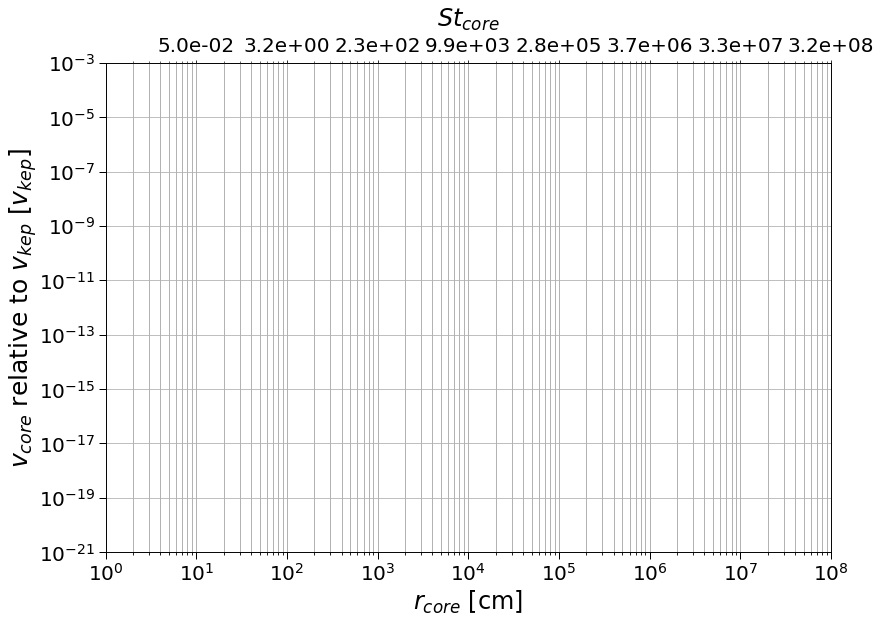

In [29]:
fig = plt.figure(1,figsize=(13,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

T = 200*(a**(-3./7.))
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
vk = (a*fn.au)*om

plt.loglog(r_array, np.abs(v_core_kep[:,0]/vk), 'r-', linewidth=4)
plt.xlim(1e0,1e8)
plt.ylim(1e-21,1e-3)
ax = plt.gca()
ax.tick_params(labelsize=20, which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)
ax.grid(which='both')
    
plt.xlabel(r'$r_{core}$ [cm]',fontsize=24)
plt.ylabel(r'$v_{core}$ relative to $v_{kep}$ [$v_{kep}$]',fontsize=25,labelpad=0.03)
#plt.show()

ax2 = ax.twiny()
new_tick_locations = np.array([1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8])#np.array([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])

def tick_function(X):
    V = np.zeros(X.size)
    for i,x in enumerate(X):
        v = st_rad(x)
        V[i] = v
    return ["%.1e" % z for z in V]

ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.tick_params(labelsize=20)
ax2.set_xlabel(r"$St_{core}$",fontsize=24,labelpad=10)
ax2.grid(which='both')
plt.show()

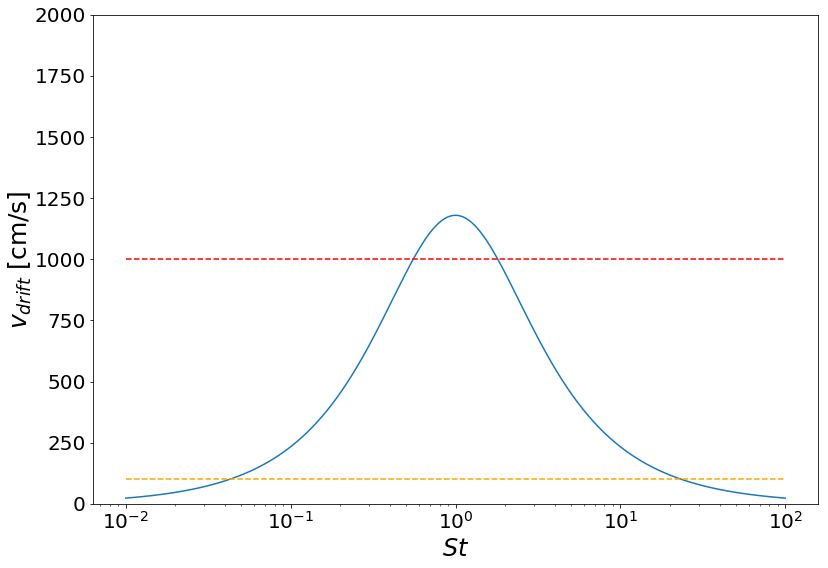

In [26]:
fig = plt.figure(1,figsize=(13,9))
#a_arr = np.logspace(-1,2,1000)
st_arr = np.logspace(-2,2,1000)
v_drift_arr = np.zeros(st_arr.size)
ones = np.ones(st_arr.size)

T = 200*(a**(-3./7.))
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a * fn.au)**3.)
vk = (a*fn.au)*om
eta = c_s**2./2./vk**2.
for i,st in enumerate(st_arr):
    v_drift_arr[i] = 2 * eta * vk * st/(1 + st**2)
plt.semilogx(st_arr, v_drift_arr)
plt.semilogx(st_arr, 100*ones, color='orange', linestyle='dashed')
plt.semilogx(st_arr, 1000*ones, 'r--')
plt.ylim(0,2000)
plt.xlabel(r'$St$',fontsize=24)
plt.ylabel(r'$v_{drift}$ [cm/s]',fontsize=25,labelpad=0.03)
ax = plt.gca()
ax.tick_params(labelsize=20)

In [27]:
a = 1
T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
vth = fn.therm_vel(c_s)
H_g = c_s/om
Sig_gas = core_lam.sig_gas
f_s = 1e-2
sig_p = core_lam.sig_solid #f_s * sig_gas
rho_g = Sig_gas/2./H_g
rho_s = 5.51 #2.
v0 = c_s**2./2./vk
alph = 1e-100

v_turb_arr = np.zeros([m_array.size, ratio_array.size])
st_arr = np.zeros([m_array.size, ratio_array.size])
H_acc_arr = np.zeros([m_array.size, ratio_array.size])
sigma_arr = np.zeros([m_array.size, ratio_array.size])
sigma_PA_arr = np.zeros([m_array.size, ratio_array.size])

for j, M in enumerate(m_array):
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * rho_s))**(1/3)
    v_esc = np.sqrt(2*fn.G*m_core/r_core)
    r_hill = fn.hill_rad(m_core, a*fn.au, fn.m_sun)
    for i, r in enumerate(ratio_array):
        s = r * r_core
        m = 4/3 * np.pi * s**3 * rho_s
        st = st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=Sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = max(H_turb,H_KH)
        rho_solid = sig_p/2./H_p
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        v_inf = v_rel_array[j, i, 0] #max(v_turb,v_lam) #r_hill * om
        bGF = r_core*(1 + (v_esc/v_inf)**2.)**(0.5)
        H_acc = min(H_p,bGF)
        sig_acc = 4*bGF*H_acc
        
        v_turb_arr[j,i] = v_turb
        st_arr[j,i] = st
        H_acc_arr[j,i] = H_p
        sigma_arr[j,i] = sig_acc

        #t_GF = m_core/((f_s*sig_gas) * (2*bGF) * (v_inf)) #m_core/(2 * f_s * sig_gas * r_hill * r_core * om)
        #t_GF_fiducial = 7e5 * (a**(3/2)) * (M**(1/3))
        t_GF = (m_core * H_p)/(sig_p * sig_acc * v_inf) #m_core/rate_GF
        #t_GF_GLS = (v_inf/om / H_acc) * (1 * r_core)/(om * sig_p) * 1/F_col(v_inf/v_esc, ang) # Modified by ratio of scale heights
        
        eta = c_s**2/(2* vk**2)
        v_gas = eta * vk * st/(1 + st**2)
        
        v_alph = np.sqrt(alph/st) * vk
        v_eta = np.sqrt(eta/st) * vk
        v_vert = np.maximum(v_alph, v_eta)
        
        for k in range(len(alph_arr)):
            if t_growth_1au[j,i,k] == 0:
                t_GF_Ruth = (om*r_hill)**2/(v_rel_array[j,i,k] * v_vert) * rho_s * r_core**2 / (f_s * Sig_gas * om * r_hill)
                print(t_GF, t_GF_Ruth)
                t_growth_1au[j,i,k] = t_GF * fn.sec_to_years #t_GF_GLS*fn.sec_to_years

NameError: name 'v_rel_array' is not defined

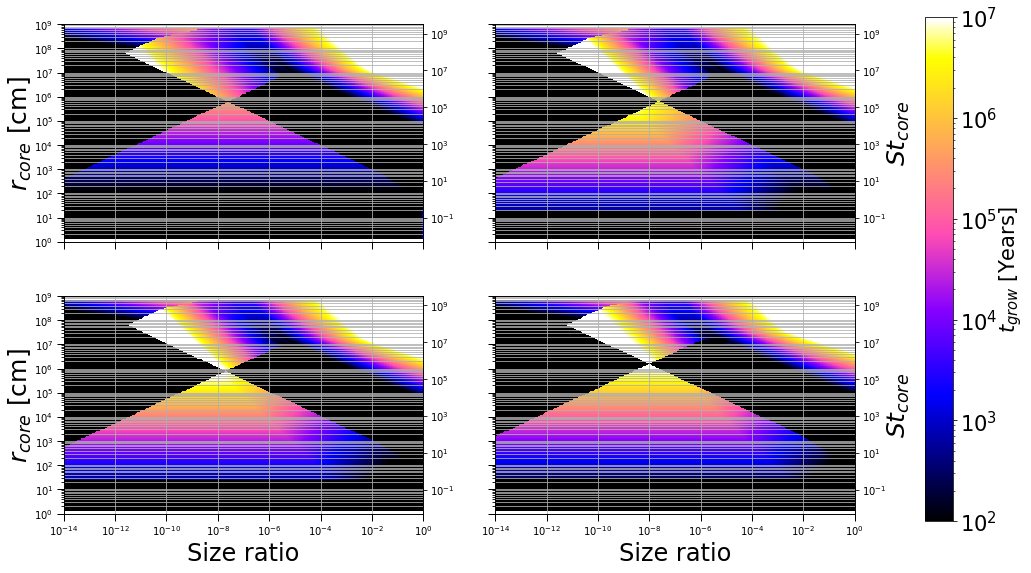

In [28]:
fig = plt.figure(1,figsize=(13,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    #r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    #r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(y1), st_rad(y2))
    ax_r.figure.canvas.draw()

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_1au[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e7)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.
    v_H = ((m_array * fn.m_earth)/(3 * fn.m_sun))**(1/3) * om
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e9)
    plt.xlim(1e-14,1e0)
    #plt.ylim(1e2,1e5)
    #plt.xlim(1e-2,1e1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid(which='both')
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
        
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e0,1e9)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.113, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

cb.ax.tick_params(labelsize=21)
#plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
plt.subplots_adjust(left=0.030,right=0.875,hspace=0.25,wspace=0.2)
plt.savefig('Size_ratio.png')


2.4620924014946203e-09


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


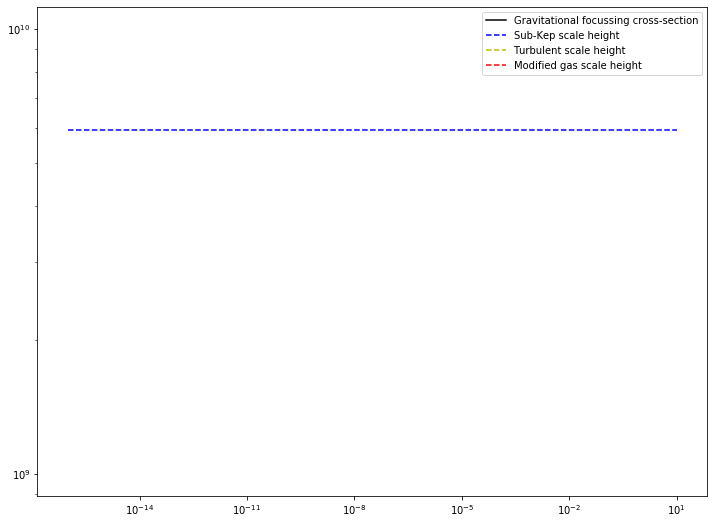

In [30]:
# M_dot ~ rho * sigma * v
j = 200 # Choose M_core ~ 1e-8 M_earth
print(m_array[j])

# Rho ~ Sigma/H
# Plots of H
fig = plt.figure(1,figsize=(12,9))
plt.loglog(ratio_array, c_s/om * np.ones(ratio_array.size), 'g--', label='Gas scale height')
plt.loglog(ratio_array, (eta * vk)/om * np.ones(ratio_array.size), 'b--', label='Sub-Kep scale height')
plt.loglog(ratio_array, v_turb_arr[j,:], 'y--', label='Turbulent scale height')
plt.loglog(ratio_array, c_s/om * np.sqrt(eta/st_arr[j,:]), 'r--', label='Modified gas scale height')
plt.loglog(ratio_array, H_acc_arr, 'k-', label='GF scale height')
plt.legend()
plt.show()

# Plots of sigma (cross section)
fig = plt.figure(1,figsize=(12,9))
plt.loglog(ratio_array, sigma_arr[j,:], 'k-', label='Gravitational focussing cross-section')
plt.loglog(ratio_array, (eta * vk)/om * np.ones(ratio_array.size), 'b--', label='Sub-Kep scale height')
plt.loglog(ratio_array, v_turb_arr[j,:], 'y--', label='Turbulent scale height')
plt.loglog(ratio_array, c_s/om * np.sqrt(eta/st_arr[j,:]), 'r--', label='Modified gas scale height')
plt.legend()
plt.show()



In [31]:
KE_rel_array = np.zeros(v_rel_array.shape)

for j, M in enumerate(m_array):
    for i, r in enumerate(ratio_array):
        m_core = M * fn.m_earth
        r_core = ((3 * m_core)/(4 * np.pi * rho_s))**(1/3)
        s = r * r_core
        m_part = 4*np.pi/3 * s**3 * rho_s
        KE_rel_array[j,i,:] = m_part * v_rel_array[j,i,:]**2

NameError: name 'v_rel_array' is not defined

In [ ]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

for j in range(1):
    ax = plt.subplot()
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,KE_rel_array[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e-15,vmax=1e14)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e9)
    plt.xlim(1e-12,1e0)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=20, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
        plt.xlabel('Size ratio',fontsize=24)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$KE_{rel}$ [ergs]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)

In [32]:
m_array = np.logspace(-26,-2,300)
ratio_array = np.logspace(-16,1,300)
t_growth_1au= np.zeros([m_array.size, ratio_array.size])
v_rel_array = np.zeros([m_array.size, ratio_array.size])
v_core_kep = np.zeros([m_array.size, ratio_array.size])
ratio_grid = np.zeros([m_array.size, s_array.size])
R_phys = np.zeros(ratio_array.shape)
R_bond = np.zeros(ratio_array.shape)

m_star = 1
a = 1
alph = 1e-100
f_s = 1e-2

om = np.sqrt(fn.G * m_star*fn.m_sun/(a * fn.au)**3)
vk = om * a
T = 200*(a**(-3./7.))
c_s = np.sqrt(fn.k*T/fn.mu)
eta = c_s**2/(2* vk**2)
Sig_gas = core_lam.sig_gas
rho_s = 3
rho_g = fn.gas_density(Sig_gas,c_s/om)
v_th = ((8./np.pi)**.5) * c_s
R_star = m_star**(1/3) * fn.r_sun
ang = R_star / (a * fn.au)

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=1, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * 5.51))**(1/3)
    r_hill = a * (m_core / (3 * m_star))**(1/3)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        #print("s is ", s)
        core_lam.main(s, rho_obj=5.51)
        
        t_growth_1au[j, i] = core_lam.t_acc
        v_rel_array[j, i] = core_lam.v_obj_core
        v_core_kep[j,i] = core_lam.v_core_phi
        
        m = 4/3 * np.pi * s**3 * rho_s
        st = st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=Sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = max(H_turb,H_KH)
        v_gas = eta * vk * st/(1 + st**2)
        
        v_alph = np.sqrt(alph/st) * vk
        v_eta = np.sqrt(eta/st) * vk
        v_vert = np.maximum(v_alph, v_eta)
        
        #v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        #v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        #v_inf = v_rel_array[j, i, 0] #max(v_turb,v_lam) #r_hill * om
        #bGF = r_core*(1 + (v_esc/v_inf)**2.)**(0.5)
        #H_acc = min(H_p,bGF)
        #sig_acc = 4*bGF*H_acc

        t_GF_GLS = (1 * r_core)/(om * sig_p) * 1/F_col(v_inf/v_esc, ang)
        #t_GF_GLS = (v_rel_array[j,i] * v_vert)/(om*r_hill)**2 * rho_s * r_core**2 / (f_s * Sig_gas * om * r_hill) #(v_inf/om / H_acc) * (1 * r_core)/(om * sig_p) * 1/F_col(v_inf/v_esc, ang) # Modified by ratio of scale heights
        
        #if t_growth_1au[j,i] == 0:
                #print("No pebble accretion: ", t_GF/t_GF_GLS, t_GF3/t_GF_GLS, t_GF_GLS) #, m_core, rho_s * 4*np.pi*(s**3)/3)
            #t_growth_1au[j,i] = t_GF_GLS*fn.sec_to_years

R_phys = ang**(3/2) * (3 * rho_s/rho_g * om/(v_th * v_gas))**(-1/2) * ratio_array**(-1/2)
#R_bond = (c_s/vk)**2 * np.sqrt(m_star*fn.m_sun) * np.sqrt((3 * om * ratio_array)/(4 * np.pi * rho_g * eta * v_th))
R_bond = (3 * c_s**2)/(4 * np.pi * rho_s * fn.G) * ang**(-3/2) * np.sqrt(3 * rho_s/rho_g * om/(v_th * v_gas)) * ratio_array**(1/2)

In [33]:
fig = plt.figure(1,figsize=(13,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

X, Y = np.meshgrid(ratio_array, r_array)
im = plt.pcolormesh(X,Y,t_growth_1au[:,:], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e9)

plt.plot(ratio_array, R_phys, 'g-')
plt.plot(ratio_array, R_bond, 'r-')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e2,1e6)
#plt.xlim(1e-4,1e0)
plt.ylim(1e0,1e8)
plt.xlim(1e-16,1e0)
    
im.set_edgecolor('face')
ax = plt.gca()
ax.tick_params(labelsize=20, which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)
ax.grid()
plt.xlabel('Size ratio',fontsize=24)
plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
        
ax_r = ax.twinx()
ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
ax.set_ylim(1e0,1e8)
ax.set_xscale('log')
ax.set_yscale('log')
ax_r.set_yscale('log')
ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.03)
ax_r.tick_params(labelsize=20)

cax = fig.add_axes([0.98, 0.113, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.030,right=0.875,hspace=0.25,wspace=0.2)
#plt.savefig('Size_ratio.png')

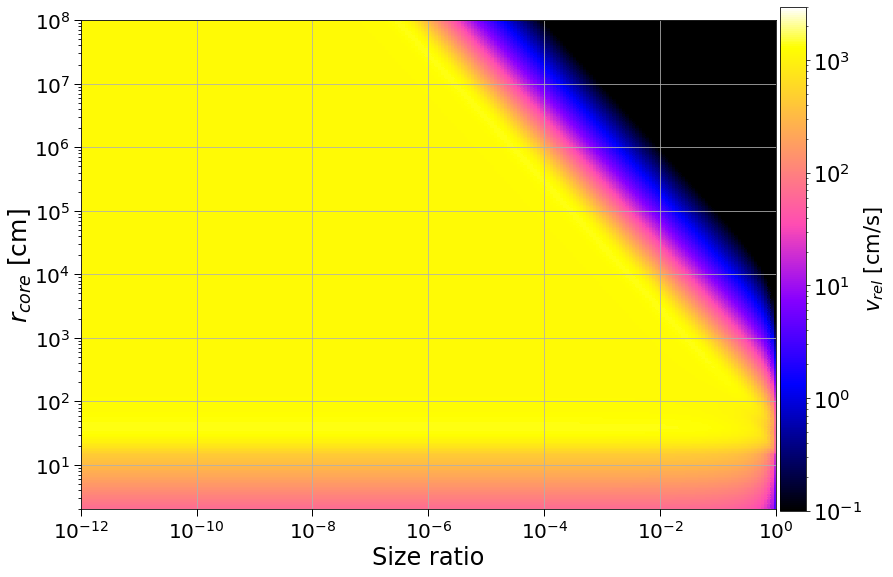

In [34]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

for j in range(1):
    ax = plt.subplot()
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,v_rel_array[:,:], cmap=cmap,norm=LogNorm(),vmin=1e-1,vmax=3e3)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e8)
    plt.xlim(1e-12,1e0)
    #plt.ylim(1e2,1e5)
    #plt.xlim(1e-2,1e1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=20, which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
        plt.xlabel('Size ratio',fontsize=24)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$v_{rel}$ [cm/s]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
#fig.suptitle("New Code", size=30);

## Now, plots to demonstrate effects of dispersion

In [35]:
%autoreload 2

m_array = np.logspace(-26,-2,300)
ratio_array = np.logspace(-16,1,300)
t_growth_1au_disp = np.zeros([m_array.size, ratio_array.size, 4])
v_rel_array = np.zeros([m_array.size, ratio_array.size, 4])
ratio_grid = np.zeros([m_array.size, s_array.size])

a = 1
T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
vth = fn.therm_vel(c_s)
H_g = c_s/om
sig_gas = core_lam.sig_gas
rho_g = sig_gas/2./H_g
rho_s = 5.51 #2.
v0 = c_s**2./2./vk
alph = 1e-5

for j, M in enumerate(m_array):
    # Initializes the core objects
    # Using alpha = 1e-4
    core_nodisp = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_low = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_mid = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_high = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * 5.51))**(1/3)
    v_esc = np.sqrt(2*fn.G*m_core/r_core)
    r_hill = fn.hill_rad(m_core, a*fn.au, fn.m_sun)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        st = st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = max(H_turb,H_KH)
        rho_solid = sig_p/2./H_p
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        v_inf = max(v_turb,v_lam)
        bGF = r_core*(1 + (v_esc/v_inf)**2.)**(0.5)
        H_acc = min(H_p,bGF)
        sig_acc = 4*bGF*H_acc
        rate_GF = rho_solid*sig_acc*v_inf
        f_s = 1e-2
        t_GF = m_core/(2 * f_s * sig_acc * r_hill * r_core * om)
        
        core_nodisp.main(s, rho_obj=5.51, disp=0)
        core_low.main(s, rho_obj=5.51, disp=0.1)
        core_mid.main(s, rho_obj=5.51, disp=1)
        core_high.main(s, rho_obj=5.51, disp=10)
        
        t_growth_1au_disp[j, i, 0] = core_nodisp.t_acc
        t_growth_1au_disp[j, i, 1] = core_low.t_acc
        t_growth_1au_disp[j, i, 2] = core_mid.t_acc
        t_growth_1au_disp[j, i, 3] = core_high.t_acc
        v_rel_array[j, i, 0] = core_nodisp.v_obj_core
        v_rel_array[j, i, 1] = core_low.v_obj_core
        v_rel_array[j, i, 2] = core_mid.v_obj_core
        v_rel_array[j, i, 3] = core_high.v_obj_core

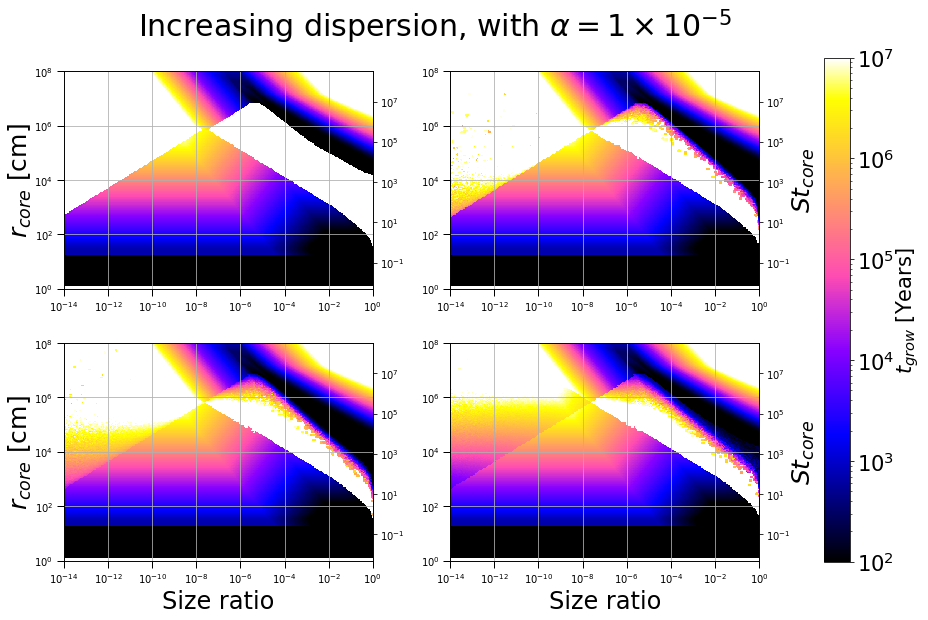

In [36]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    #r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    #r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(y1), st_rad(y2))
    ax_r.figure.canvas.draw()

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_1au_disp[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e7)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.    
    v_H = ((m_array * fn.m_earth)/(3 * fn.m_sun))**(1/3) * om
    #plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    #plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    st_max = np.minimum(3 * np.power(v_H,3) * eta*vk/(c_s**4), 9 * np.power(v_H/c_s,6))
    #m_max = 
    plt.plot(r_array, st_max, 'b--')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e8)
    plt.xlim(1e-14,1e0)
    #plt.ylim(1e2,1e5)
    #plt.xlim(1e-2,1e1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid(which='both')
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
        
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e0,1e8)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

cb.ax.tick_params(labelsize=21)
#plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.25,wspace=0.25)
fig.suptitle('Increasing dispersion, with '+r'$\alpha = 1 \times 10^{-5}$', size=30);

In [37]:
%autoreload 2

m_array = np.logspace(-26,-2,300)
ratio_array = np.logspace(-16,1,300)
t_growth_1au_disp = np.zeros([m_array.size, ratio_array.size, 4])
v_rel_array = np.zeros([m_array.size, ratio_array.size, 4])
ratio_grid = np.zeros([m_array.size, s_array.size])

a = 1
T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
vth = fn.therm_vel(c_s)
H_g = c_s/om
sig_gas = core_lam.sig_gas
rho_g = sig_gas/2./H_g
rho_s = 5.51 #2.
v0 = c_s**2./2./vk
alph = 1e-4

for j, M in enumerate(m_array):
    # Initializes the core objects
    # Using alpha = 1e-4
    core_nodisp = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_low = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_mid = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_high = Core(a_core_au=a, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * 5.51))**(1/3)
    v_esc = np.sqrt(2*fn.G*m_core/r_core)
    r_hill = fn.hill_rad(m_core, a*fn.au, fn.m_sun)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        st = st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = max(H_turb,H_KH)
        rho_solid = sig_p/2./H_p
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        v_inf = max(v_turb,v_lam)
        bGF = r_core*(1 + (v_esc/v_inf)**2.)**(0.5)
        H_acc = min(H_p,bGF)
        sig_acc = 4*bGF*H_acc
        rate_GF = rho_solid*sig_acc*v_inf
        f_s = 1e-2
        t_GF = m_core/(2 * f_s * sig_acc * r_hill * r_core * om) #m_core/(rate_GF)
        
        #for k in range(len(alph_arr)):
        #    if t_growth_1au[j,i,k] == 0:
        #        #print("No pebble accretion: ", t_growth_1au[j,i,0], t_GF)
        #        t_growth_1au[j,i,k] = t_GF * fn.sec_to_years
        
        core_nodisp.main(s, rho_obj=5.51, disp=0)
        core_low.main(s, rho_obj=5.51, disp=0.1)
        core_mid.main(s, rho_obj=5.51, disp=1)
        core_high.main(s, rho_obj=5.51, disp=10)
        
        t_growth_1au_disp[j, i, 0] = core_nodisp.t_acc
        t_growth_1au_disp[j, i, 1] = core_low.t_acc
        t_growth_1au_disp[j, i, 2] = core_mid.t_acc
        t_growth_1au_disp[j, i, 3] = core_high.t_acc
        v_rel_array[j, i, 0] = core_nodisp.v_obj_core
        v_rel_array[j, i, 1] = core_low.v_obj_core
        v_rel_array[j, i, 2] = core_mid.v_obj_core
        v_rel_array[j, i, 3] = core_high.v_obj_core

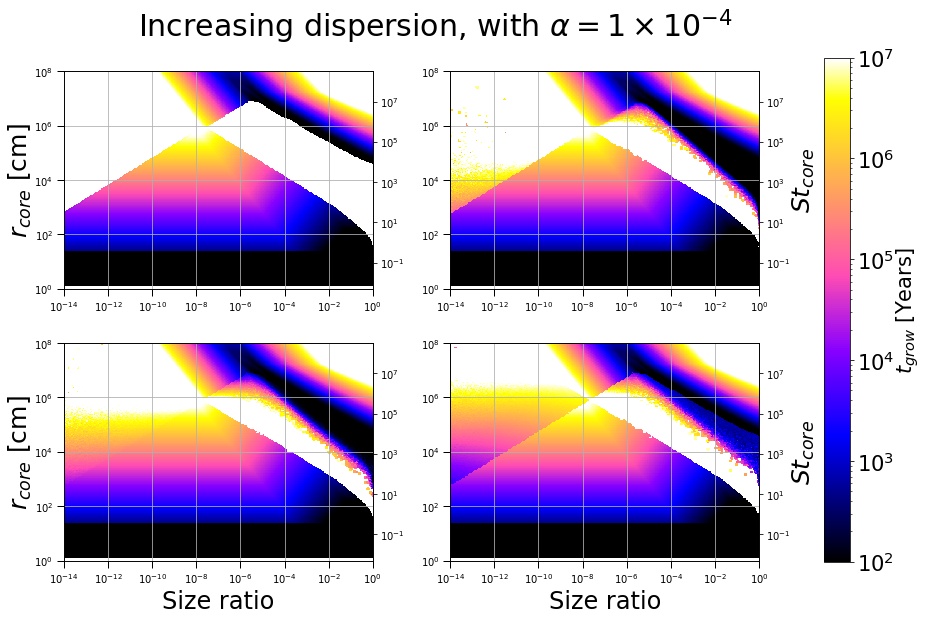

In [38]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    #r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    #r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(y1), st_rad(y2))
    ax_r.figure.canvas.draw()

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_1au_disp[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e7)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.    
    v_H = ((m_array * fn.m_earth)/(3 * fn.m_sun))**(1/3) * om
    #plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    #plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    st_max = np.minimum(3 * np.power(v_H,3) * eta*vk/(c_s**4), 9 * np.power(v_H/c_s,6))
    #m_max = 
    plt.plot(r_array, st_max, 'b--')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e8)
    plt.xlim(1e-14,1e0)
    #plt.ylim(1e2,1e5)
    #plt.xlim(1e-2,1e1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid(which='both')
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
        
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e0,1e8)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

cb.ax.tick_params(labelsize=21)
#plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.25,wspace=0.25)
fig.suptitle('Increasing dispersion, with '+r'$\alpha = 1 \times 10^{-4}$', size=30);

In [39]:
%autoreload 2

m_array = np.logspace(-26,-2,300)
ratio_array = np.logspace(-16,1,300)
t_growth_1au_disp = np.zeros([m_array.size, ratio_array.size, 4])
v_rel_array = np.zeros([m_array.size, ratio_array.size, 4])
ratio_grid = np.zeros([m_array.size, s_array.size])

a = 1
T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
vth = fn.therm_vel(c_s)
H_g = c_s/om
sig_gas = core_lam.sig_gas
rho_g = sig_gas/2./H_g
rho_s = 5.51 #2.
v0 = c_s**2./2./vk
alph = 1e-3

for j, M in enumerate(m_array):
    # Initializes the core objects
    # Using alpha = 1e-4
    core_nodisp = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_low = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_mid = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    core_high = Core(a_core_au=a, m_core_earthmasses=M, alpha=alph, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=rho_s)
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * 5.51))**(1/3)
    v_esc = np.sqrt(2*fn.G*m_core/r_core)
    r_hill = fn.hill_rad(m_core, a*fn.au, fn.m_sun)
    
    for i, r in enumerate(ratio_array):
        s = r * r_core
        st = st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = max(H_turb,H_KH)
        rho_solid = sig_p/2./H_p
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        v_inf = max(v_turb,v_lam)
        bGF = r_core*(1 + (v_esc/v_inf)**2.)**(0.5)
        H_acc = min(H_p,bGF)
        sig_acc = 4*bGF*H_acc
        rate_GF = rho_solid*sig_acc*v_inf
        f_s = 1e-2
        t_GF = m_core/(2 * f_s * sig_acc * r_hill * r_core * om)
        
        core_nodisp.main(s, rho_obj=5.51, disp=0)
        core_low.main(s, rho_obj=5.51, disp=0.1)
        core_mid.main(s, rho_obj=5.51, disp=1)
        core_high.main(s, rho_obj=5.51, disp=10)
        
        t_growth_1au_disp[j, i, 0] = core_nodisp.t_acc
        t_growth_1au_disp[j, i, 1] = core_low.t_acc
        t_growth_1au_disp[j, i, 2] = core_mid.t_acc
        t_growth_1au_disp[j, i, 3] = core_high.t_acc
        v_rel_array[j, i, 0] = core_nodisp.v_obj_core
        v_rel_array[j, i, 1] = core_low.v_obj_core
        v_rel_array[j, i, 2] = core_mid.v_obj_core
        v_rel_array[j, i, 3] = core_high.v_obj_core

In [40]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    #r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    #r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(y1), st_rad(y2))
    ax_r.figure.canvas.draw()

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(ratio_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_1au_disp[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e2,vmax=1e7)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.    
    v_H = ((m_array * fn.m_earth)/(3 * fn.m_sun))**(1/3) * om
    #plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    #plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    st_max = np.minimum(3 * np.power(v_H,3) * eta*vk/(c_s**4), 9 * np.power(v_H/c_s,6))
    #m_max = 
    plt.plot(r_array, st_max, 'b--')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e0,1e8)
    plt.xlim(1e-14,1e0)
    #plt.ylim(1e2,1e5)
    #plt.xlim(1e-2,1e1)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid(which='both')
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel('Size ratio',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel('Size ratio',fontsize=24)
        
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e0,1e8)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

cb.ax.tick_params(labelsize=21)
#plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.25,wspace=0.25)
fig.suptitle('Increasing dispersion, with '+r'$\alpha = 1 \times 10^{-3}$', size=30);

In [41]:
m_array = np.logspace(-22,2,1000)
s_array = np.logspace(-16,8,1000)
t_growth_1au_size = np.zeros([m_array.size, s_array.size, 5])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=1, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a5 = Core(a_core_au=1, m_core_earthmasses=M, alpha=1e-5, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a4 = Core(a_core_au=1, m_core_earthmasses=M, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a3 = Core(a_core_au=1, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a2 = Core(a_core_au=1, m_core_earthmasses=M, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)

    for i in range(s_array.size):
        core_lam.main(s_array[i], rho_obj=5.51)
        core_a5.main(s_array[i], rho_obj=5.51)
        core_a4.main(s_array[i], rho_obj=5.51)
        core_a3.main(s_array[i], rho_obj=5.51)
        core_a2.main(s_array[i], rho_obj=5.51)
        
        t_growth_1au_size[j, i, 0] = core_lam.t_acc
        t_growth_1au_size[j, i, 1] = core_a5.t_acc
        t_growth_1au_size[j, i, 2] = core_a4.t_acc
        t_growth_1au_size[j, i, 3] = core_a3.t_acc
        t_growth_1au_size[j, i, 4] = core_a2.t_acc

In [42]:
a = 1
T = 200*a**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a*fn.au)**3.)
vk = a*fn.au*om
eta = c_s**2./2./vk**2.
vth = fn.therm_vel(c_s)
H_g = c_s/om
sig_gas = core_lam.sig_gas
rho_g = sig_gas/2./H_g
rho_s = 5.51 #2.
v0 = c_s**2./2./vk
alph = 1e-100

for j, M in enumerate(m_array):
    m_core = M * fn.m_earth
    r_core = ((3 * m_core)/(4 * np.pi * rho_s))**(1/3)
    v_esc = np.sqrt(2*fn.G*m_core/r_core)
    for i, r in enumerate(s_array):
        #s = r * r_core
        st = st_rad(rad=s,alph = alph,a_au=a,m_suns=1,m_earths=M,sig_in=sig_gas,temp_in=T)
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_turb = np.sqrt(alph/(alph+st))*H_g
        H_KH = 2*v0/om
        H_p = max(H_turb,H_KH)
        rho_solid = sig_p/2./H_p
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
        v_inf = max(v_turb,v_lam)
        bGF = r_core*(1 + (v_esc/v_inf)**2.)**(0.5)
        H_acc = min(H_p,bGF)
        sig_acc = 4*bGF*H_acc
        rate_GF = rho_solid*sig_acc*v_inf
        #rate_peb = m/(core.t_acc/fn.sec_to_years)
        t_GF = m_core/(rate_GF)
        
        for k in range(len(alph_arr)):
            if t_growth_1au_size[j,i,k] == 0:
                #print("No pebble accretion: ", t_growth_1au[j,i,0], t_GF)
                t_growth_1au_size[j,i,k] = t_GF * fn.sec_to_years

In [43]:
fig = plt.figure(1,figsize=(12,9))
r_array = (3 * m_array*fn.m_earth/(4 * np.pi * 5.51))**(1/3)

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, r_array)
    im = plt.pcolormesh(X,Y,t_growth_1au_size[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e-1,vmax=1e2)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e2,1e5)
    plt.xlim(1e2,1e5)
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid(which='both')
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$r_{core}$ [cm]',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)

Text(0.5, 0.98, 'New Code')

41.472860853609056 5.65e-01


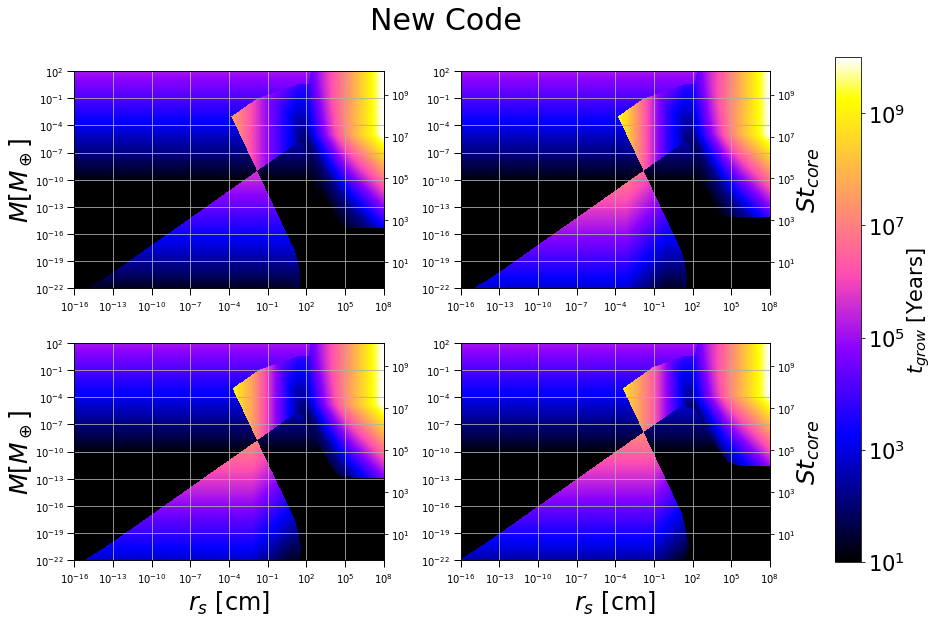

In [44]:
def convert_ax_r_to_St(ax):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax.get_ylim()
    r1 = (3 * y1*fn.m_earth/(4 * np.pi * 2))**(1/3)
    r2 = (3 * y2*fn.m_earth/(4 * np.pi * 2))**(1/3)
    ax_r.set_ylim(st_rad(r1), st_rad(r2))
    ax_r.figure.canvas.draw()
    
fig = plt.figure(1,figsize=(12,9))

for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,t_growth_1au_size[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)
    T = 200*(1**(-3./7.))
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(fn.au)**3.)
    vk = fn.au*om
    eta = c_s**2./2./vk**2.
    v_H = ((m_array * fn.m_earth)/(3 * fn.m_sun))**(1/3) * om
    #plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
    #plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    st_max = np.minimum(3 * np.power(v_H,3) * eta*vk/(c_s**4), 9 * np.power(v_H/c_s,6))
    #m_max = 
    plt.plot(s_array, st_max, 'b--')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    ax.grid()
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        ax.set_xlabel(r'$r_{s}$ [cm]',fontsize=24)
        ax.set_ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        
    ax_r = ax.twinx()
    ax.callbacks.connect("ylim_changed", convert_ax_r_to_St)
    ax.set_ylim(1e-22,1e2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax_r.set_yscale('log')
    if j==1: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    elif j==3: ax_r.set_ylabel(r'$St_{core}$',fontsize=25,labelpad=0.05)
    
    #plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.25,wspace=0.25) #(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)


r_test = (3 * 1e-22*fn.m_earth/(4 * np.pi * 2))**(1/3)
print(r_test, '{:.2e}'.format(st_rad(r_test)))

## Working on Kataoka et al. 2013 fluffy accretion

In [59]:
f = open('fluffy_datasets.csv', 'r')
file = f.readlines()
#m_fluffy = np.logspace(-15,20,1000)
fluffy_data = np.zeros([2,137])

fluffy_hit = np.array([np.array([4.375479375074162e-15, 0.000012347387889058681]),
                       np.array([0.9778855323899028, 0.000018796771277218444])])

fluffy_grav = np.array([np.array([408998402513.65, 582864715571862400]),
                       np.array([0.00033205403948580035, 0.09467311409373241])])

for i,x in enumerate(file):
    if i > 1:
        fluffy_data[0,i-2] = x.split(',')[0]
        fluffy_data[1,i-2] = x.split(',')[1]

In [71]:
# Replotting extracted data
plt.loglog(fluffy_hit[0], fluffy_hit[1], 'k-')
plt.loglog(fluffy_data[0], fluffy_data[1], 'b.')
plt.loglog(fluffy_grav[0], fluffy_grav[1], 'r-')
plt.xlim(1e-15,1e20);
plt.ylim(5e-6,2e0);

(5e-06, 2.0)

In [191]:
# Plotting my arrays w/ same data as above
n_points = 100
m1 = np.logspace(-15,-5,n_points)
m2 = np.logspace(-5,np.log10(4e11),137)
m3 = np.logspace(np.log10(4e11),18,n_points)

rho1 = np.logspace(0,np.log10(1.5e-5),n_points)
rho2 = fluffy_data[1]
rho3 = np.logspace(np.log10(3e-4), -1,n_points)

a_au = 5
sig = 1700 * a_au**(-1.5) #500 * a_au**(-1)
s1 = np.power((3 * m1)/(4 * rho1 * np.pi),1/3)
st1 = np.sqrt(np.pi/2) * rho1 * s1/sig
s2 = np.power((3 * m2)/(4 * rho2 * np.pi),1/3)
st2 = np.sqrt(np.pi/2) * rho2 * s2/sig
s3 = np.power((3 * m3)/(4 * rho3 * np.pi),1/3)
st3 = np.sqrt(np.pi/2) * rho3 * s3/sig
st = np.append(st1,st2)
st = np.append(st,st3)
# Now, find the point where St = 1
ind_st1 = np.argmin(abs(st3 - 1))
m_st1 = m3[ind_st1]
rho_st1 = rho3[ind_st1]

In [221]:
m = np.append(m1, m2)
m = np.append(m, m3)
rho = np.append(rho1, rho2)
rho = np.append(rho, rho3)

t_drift_arr = np.zeros([m.size, rho.size])
t_grow_arr = np.zeros([m.size, rho.size])

a_au = 5
alph = 1e-3
sig = 1700 * a_au**(-1.5)
T = 137 * a_au**(-3/7)
v_t = np.sqrt(alph) * fn.sound_speed(T)
om = fn.omega(fn.m_sun, a_au*fn.au)
H = fn.scale_height(fn.sound_speed(T), om)
eta = 4e-3 * (a_au/5)**(1/2)
for i,m_ind in enumerate(m):
    for j,rho_ind in enumerate(rho):
        vk = om * a_au*fn.au
        s = np.power((3 * m_ind)/(4 * rho_ind * np.pi),1/3)
        st = np.sqrt(np.pi/2) * rho_ind * s/sig
        delt_v = v_t * np.sqrt(1/(1 + st))
        v_drift = 2 * eta * vk * (st/(1 + st**2))
        t_drift_arr[i,j] = (a_au * fn.au)/v_drift
        t_grow_arr[i,j] = m_ind/(sig/(2*H) * np.pi * s**2 * delt_v)


In [222]:
print(sig/(2*H))

2.7549565968853822e-11


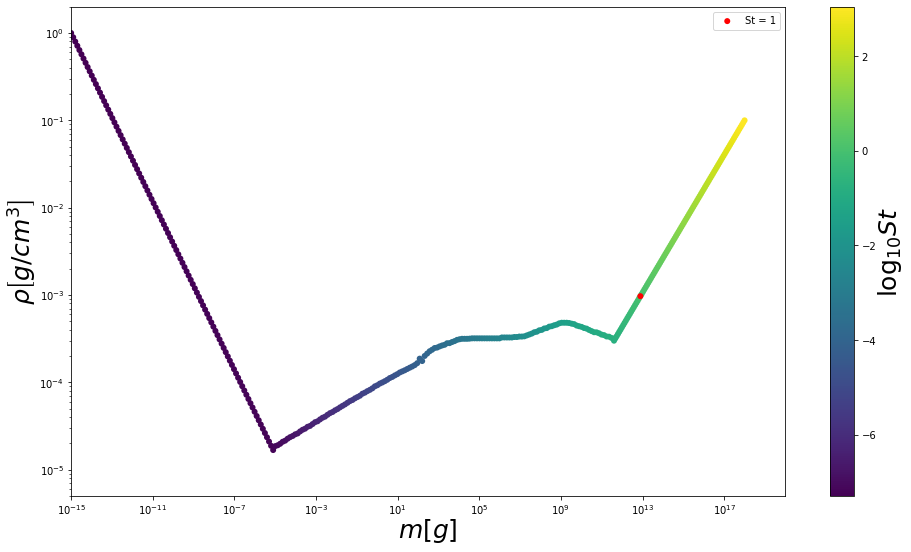

In [226]:
fig = plt.figure(1,figsize=(16,9))
cmap = cm.viridis #coolwarm
vmax = max(np.log10(st3))
vmin = min(np.log10(st1))
sm_st = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin,vmax=vmax))
sm_st.set_array([]) 

plt.scatter(m1[:-1], rho1[:-1], c=sm_st.to_rgba(np.log10(st1[:-1])), edgecolor='none') #c=cm.hot(st1)
plt.scatter(m2, rho2, c=sm_st.to_rgba(np.log10(st2)), edgecolor='none')
plt.scatter(m3, rho3, c=sm_st.to_rgba(np.log10(st3)), edgecolor='none')
plt.scatter(m_st1, rho_st1, c='red', edgecolor='none', label='St = 1') # Red dot where St = 1
#for i,m_ind in enumerate(m):
    #for j,rho_ind in enumerate(rho):
        #if t_drift_arr[i,j] <= t_grow_arr[i,j]:
            #print(i,j, t_grow_arr[i,j], t_drift_arr[i,j])
            #plt.scatter(m_ind, rho_ind, c='magenta', edgecolor='none')

plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-15,1e20);
plt.ylim(5e-6,2e0);

cbar = plt.colorbar(sm_st)
cbar.set_label('$\log_{10} St$',fontsize=25,labelpad=0.03)
plt.legend()
plt.ylabel(r'$\rho \left[ g / cm^{3} \right]$',fontsize=25,labelpad=0.03);
plt.xlabel(r'$m [g] $',fontsize=25,labelpad=0.03);

## Below is from NESSF Proposal

0 1e-100 0.0 4.0
1 0.0001 0.0 4.0


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


yes


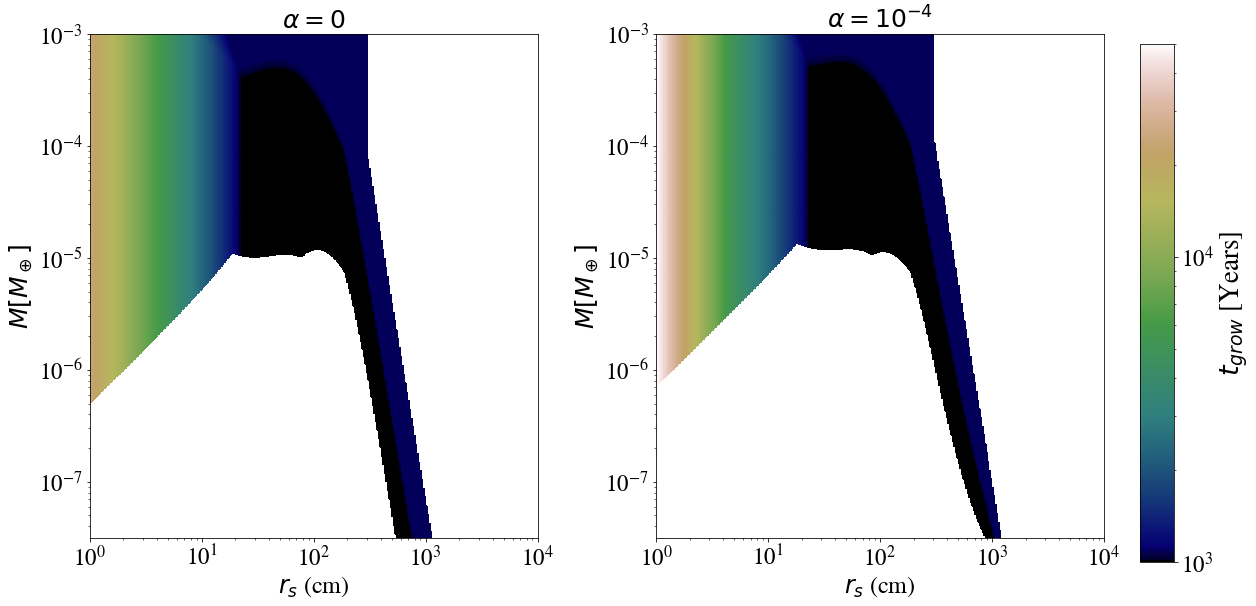

In [11]:
from matplotlib.colors import LogNorm
import os

#Flags
save_fig = 1

plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
file_names = ['rev_a_3.0_M___1.0_alph_0.00000_long_grid_2','rev_a_3.0_M___1.0_alph_0.00010_long_grid_2']

fig = plt.figure(1,figsize=(16,9))


# props = dict(boxstyle='round,pad=1', facecolor='wheat', alpha=0.6)

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('Data/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)

    if os.path.exists('Data/' + fname + '.txt'):
        time_arr = np.loadtxt('Data/' + fname + '.txt')
    else:
        time_arr = np.loadtxt('Data/' + fname)
        print("Does Not Exist")

    ax = plt.subplot(1,2,j+1)
    plt.rc('lines', linewidth=3)
    print(j,alph, r_range_low, r_range_hi)
    ax = plt.gca()

    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)

    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=1e3,vmax=5e4)

    plt.xscale('log')
    plt.yscale('log')
    # plt.ylim(1e-2, max(lum_array))
    # cbar = plt.colorbar(im)
    plt.xlabel(r'$r_{s}$ (cm)',fontsize=24)
    plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25)
    # cbar.set_label(r'$t_{grow}$ (years)')
    # plt.title('Timescale - ' + param_str)
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=23)
    # ax.set_axis_bgcolor('#D3D3D3')

    # ax.autoscale = False
    im_2 = plt.imread("Data/red_lines_3.png")
    # implot = plt.imshow(im_2)
    # implot = plt.imshow(im_2,extent=[10**(-10),10**10,10**(-10),10**10],aspect=1.5)
    implot = plt.imshow(im_2,extent=[10**r_range_low/1e2,10**r_range_hi*1e2,10**m_range_low/1e2,10**m_range_hi*1e2])
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))


param_str = r'rev_$a = %.1f$ AU, $M_* = %.1fM_{\odot}$_2'% (semi_major,m_star)
# plt.suptitle('Timescale - ' + param_str,fontsize=20,y=0.87)

cax = fig.add_axes([1.0, 0.1, 0.03, 0.8])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=27)
cb.ax.tick_params(labelsize=23)


#fig.set_tight_layout(True)

plt.tight_layout()

if save_fig:
    fig.savefig('test.png', bbox_inches="tight", dpi=300)
    print('yes')
plt.show()

Text(0.5, 0.98, 'New Code')

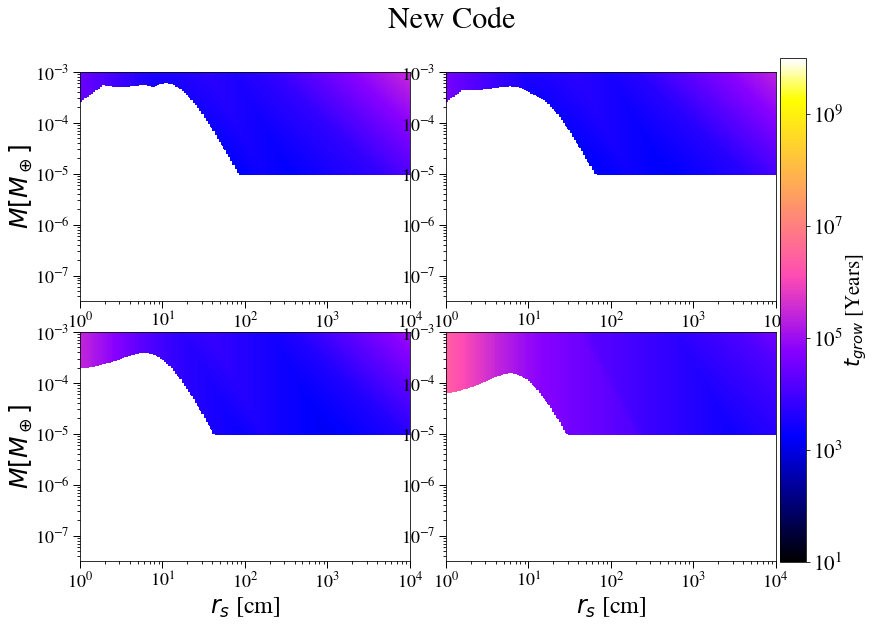

In [13]:
fig = plt.figure(1,figsize=(12,9))        
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)

## Now, making drag law plots

In [17]:
cs = fn.sound_speed(200) # 200 K
om = fn.omega(1, 1) # 1 solar mass, 1 AU
H = fn.scale_height(cs, om)
rho_g = fn.gas_density(500, H) # Sigma = 500 g/cm^2 (at 1 AU)
v_th = np.sqrt(8/np.pi) * cs
v_rel = 3e4 # 30 m/s 
lam = fn.mean_free_path(3.93e-24, rho_g, 1e-15) # mu, rho_g, cross
s_array = np.logspace(-4,2)
re_array = (4 * v_rel)/(v_th * lam) * s_array

F_D_Stokes = 3 * np.pi * rho_g * v_th * v_rel * lam * s_array
F_D_ram = 0.22 * np.pi * rho_g * v_rel**2 * np.power(s_array,2)

def C_D(Re):
    return 24/Re * np.power(1 + 0.27 * Re, 0.43) + 0.47 * (1 - np.exp(-0.04 * np.power(Re, 0.38)))
F_D_interm = 0.5 * C_D(re_array) * np.pi * np.power(s_array,2) * rho_g * v_rel**2

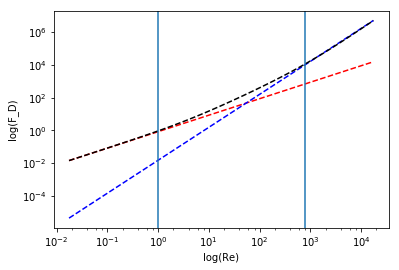

In [20]:
plt.loglog(re_array, F_D_Stokes, 'r--')
plt.loglog(re_array, F_D_ram, 'b--')
plt.loglog(re_array, F_D_interm, 'k--')
plt.axvline(x=1)
plt.axvline(x=800)
plt.xlabel("log(Re)")
plt.ylabel("log(F_D)")